In [51]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))
suppressMessages(library(ChIPseeker))
suppressMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))
suppressMessages(library(org.Hs.eg.db))
suppressMessages(library(GenomicRanges))
suppressMessages(library(writexl))

In [3]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [4]:
proj <- loadArchRProject("./ArchRProject_Myeloid", showLogo = FALSE)

Successfully loaded ArchRProject!



In [5]:
# 把效应T筛选出来进行细分
macro_cells <- getCellNames(ArchRProj = proj)[proj$MyeloidType=="Macrophages"]
proj_sub <- proj[macro_cells,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [6]:
proj_sub <- addImputeWeights(proj_sub)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-20b6213b24a933-Date-2025-04-22_Time-07-13-48.146441.log
If there is an issue, please report to github with logFile!

2025-04-22 07:13:48.435034 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)



In [7]:
proj_sub <- addHarmony(
    ArchRProj = proj_sub,
    reducedDims = "Harmony_Myeloid",
    name = "Harmony_Macro",
    groupBy = "Sample",
    force = TRUE
)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [8]:
proj_sub <- addUMAP(
    ArchRProj = proj_sub,
    reducedDims = "Harmony_Macro",
    name = "UMAP_Macro",
    nNeighbors = 45,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

07:13:55 UMAP embedding parameters a = 1.75 b = 0.8421

07:13:55 Read 3324 rows and found 29 numeric columns

07:13:55 Using Annoy for neighbor search, n_neighbors = 45

07:13:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:13:56 Writing NN index file to temp file /tmp/RtmpJzwDOJ/file20b62171a43d83

07:13:56 Searching Annoy index using 48 threads, search_k = 4500

07:13:56 Annoy recall = 100%

07:13:57 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 45

07:13:58 Initializing from normalized Laplacian + noise (using RSpectra)

07:13:58 Commencing optimization for 500 epochs, with 233356 positive edges

07:13:58 Using rng type: pcg

07:14:05 Optimization finished

07:14:05 Creating temp model dir /tmp/RtmpJzwDOJ/dir20b6214ad434e7

07:14:05 Creating dir /tmp/RtmpJzwDOJ/dir20b6214ad434e7

07:14:06 Changing to /tmp/RtmpJzwDOJ/dir20b6214ad434e7

07:14:06 Creating /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_Myeloid/Embeddings/Save-Uwot-UMAP-Params-Harmony_Macro-20b6212826361e-Date-2025-04-22_Time-07-14-05.632302.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b62120386983-Date-2025-04-22_Time-07-14-06.461684.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b62120386983-Date-2025-04-22_Time-07-14-06.461684.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b6215ea0d28c-Date-2025-04-22_Time-07-14-06.873554.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b6215ea0d28c-Date-2025-04-22_Time-07-14-06.873554.log



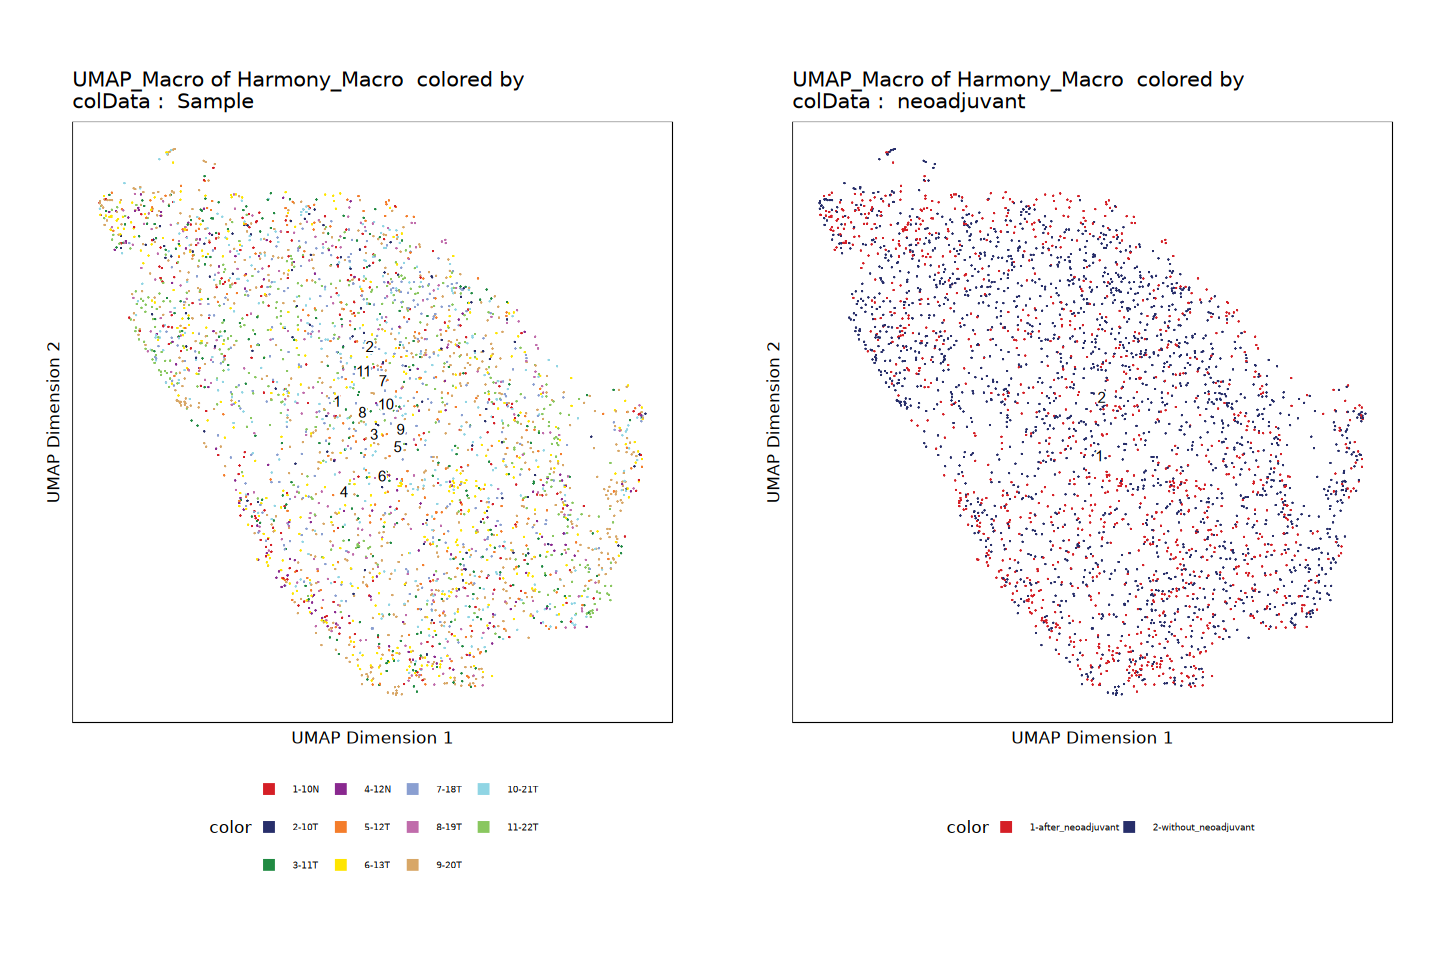

In [9]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Macro"
    )
p2 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_Macro"
    )
ggAlignPlots(p1, p2, type = "h")

In [10]:
proj_sub <- addClusters(proj_sub, name = "clusters_Macro", resolution = 1.0, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-20b621638b9294-Date-2025-04-22_Time-07-14-09.891987.log
If there is an issue, please report to github with logFile!



Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-04-22 07:14:10.169103 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3324
Number of edges: 125159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7334
Number of communities: 11
Elapsed time: 0 seconds


2025-04-22 07:14:14.072474 : Testing Outlier Clusters, 0.068 mins elapsed.

2025-04-22 07:14:14.07693 : Assigning Cluster Names to 11 Clusters, 0.068 mins elapsed.

2025-04-22 07:14:14.156191 : Finished addClusters, 0.07 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b62160f5537-Date-2025-04-22_Time-07-14-14.174958.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b62160f5537-Date-2025-04-22_Time-07-14-14.174958.log



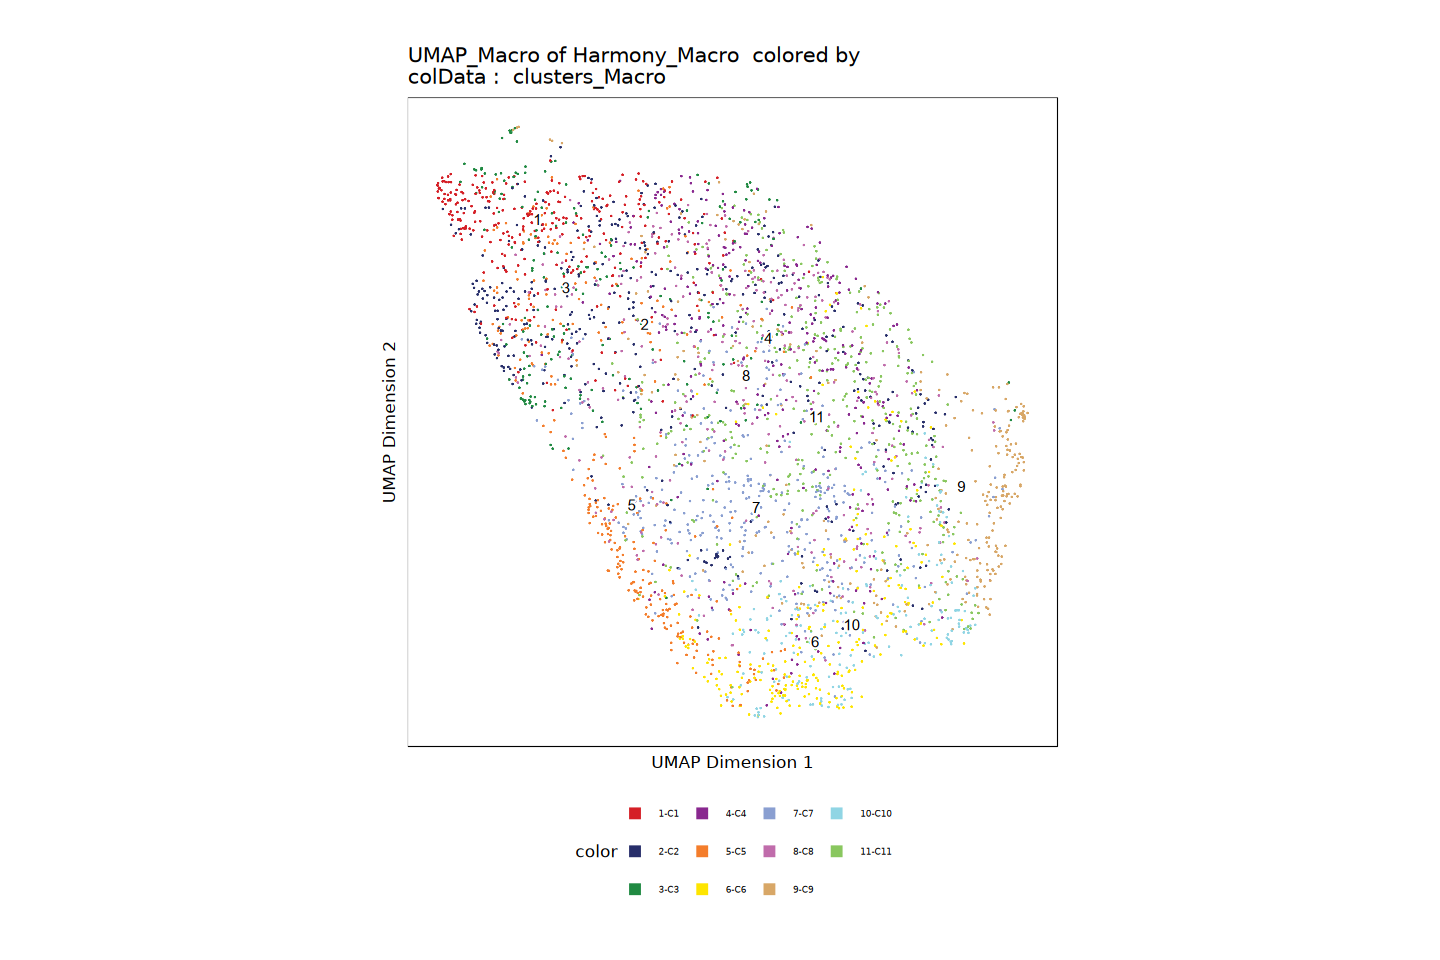

In [11]:
p3 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "clusters_Macro", 
    embedding = "UMAP_Macro"
    )
p3

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b62133630ec7-Date-2025-04-22_Time-07-14-15.937336.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-22 07:14:16.174724 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b62133630ec7-Date-2025-04-22_Time-07-14-15.937336.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


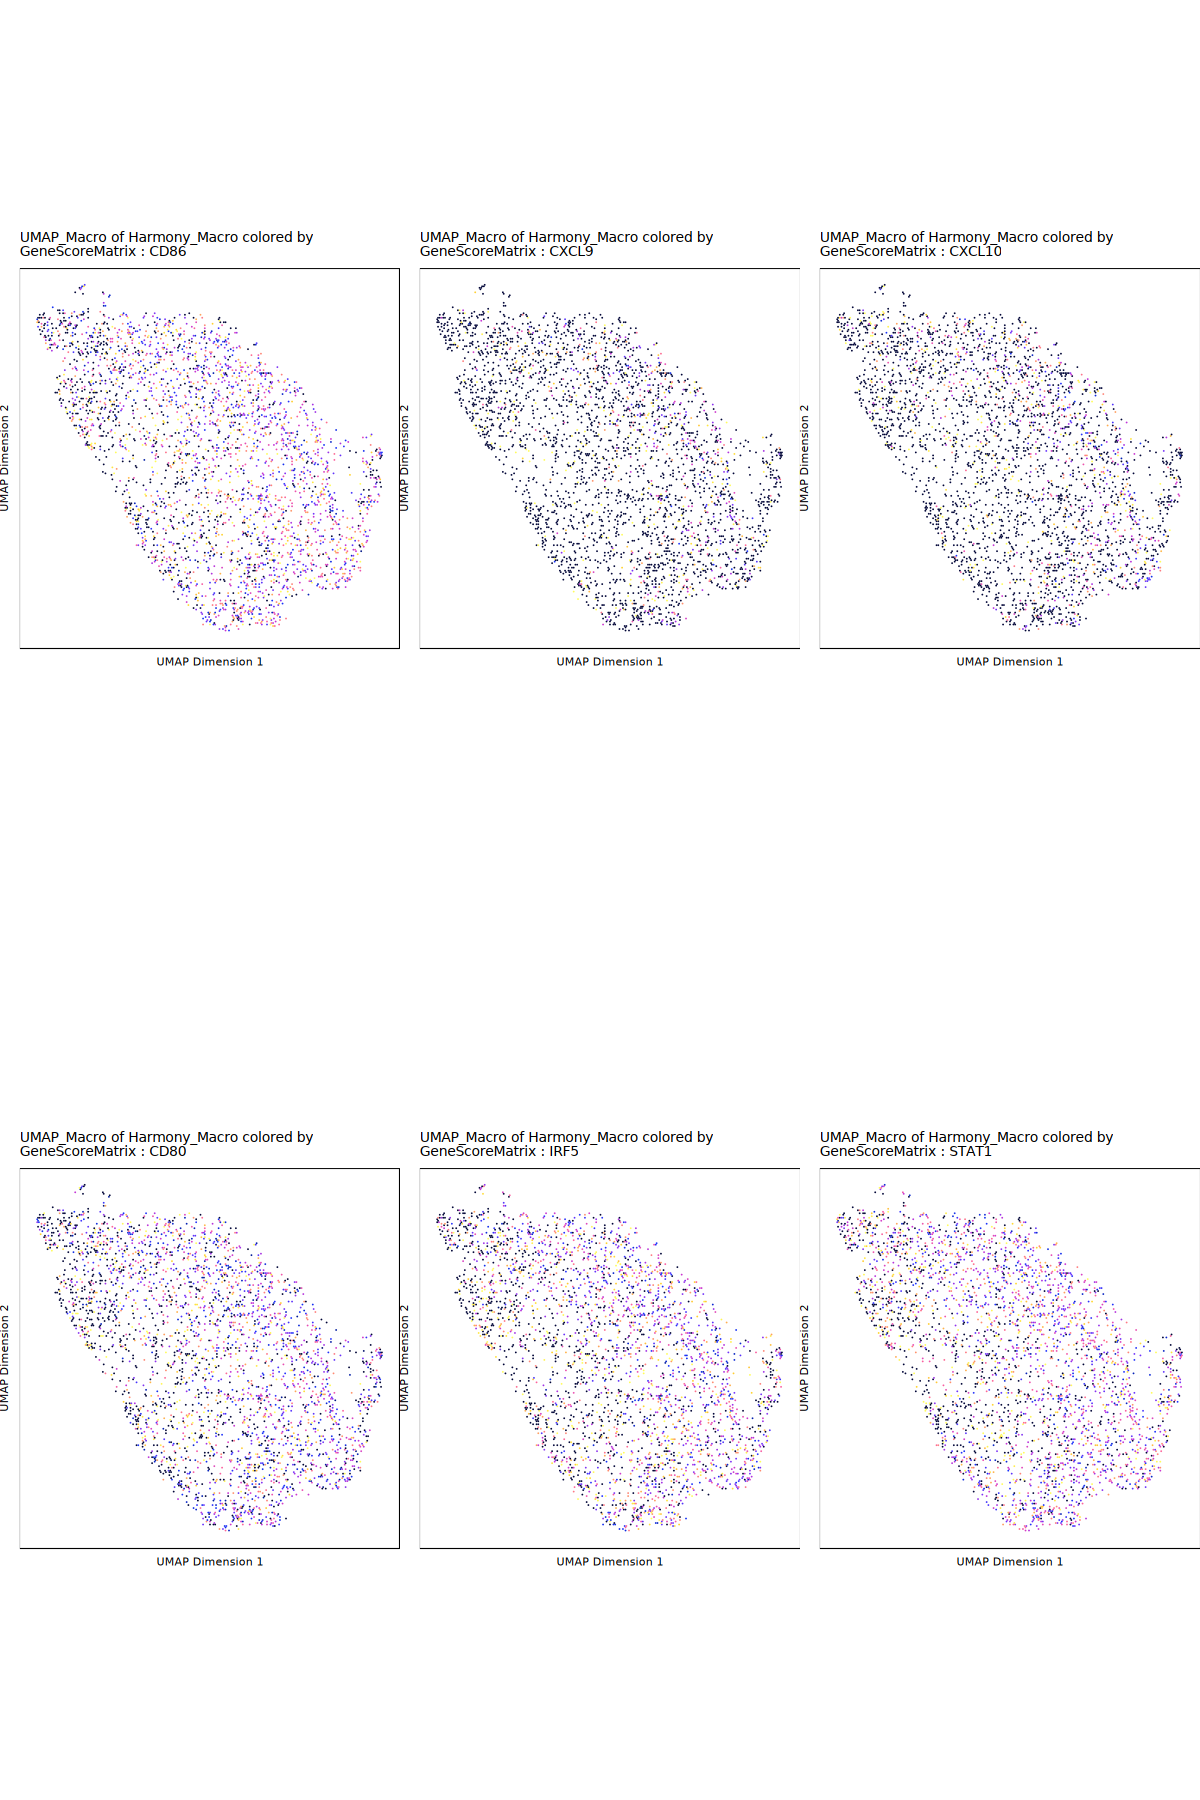

In [12]:
# M1
markerGenes <- c(
  "CD86", "CXCL9", "CXCL10", "CD80", "IRF5", "STAT1"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Macro",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b62126131610-Date-2025-04-22_Time-07-14-24.721817.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-22 07:14:24.978021 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b62126131610-Date-2025-04-22_Time-07-14-24.721817.log



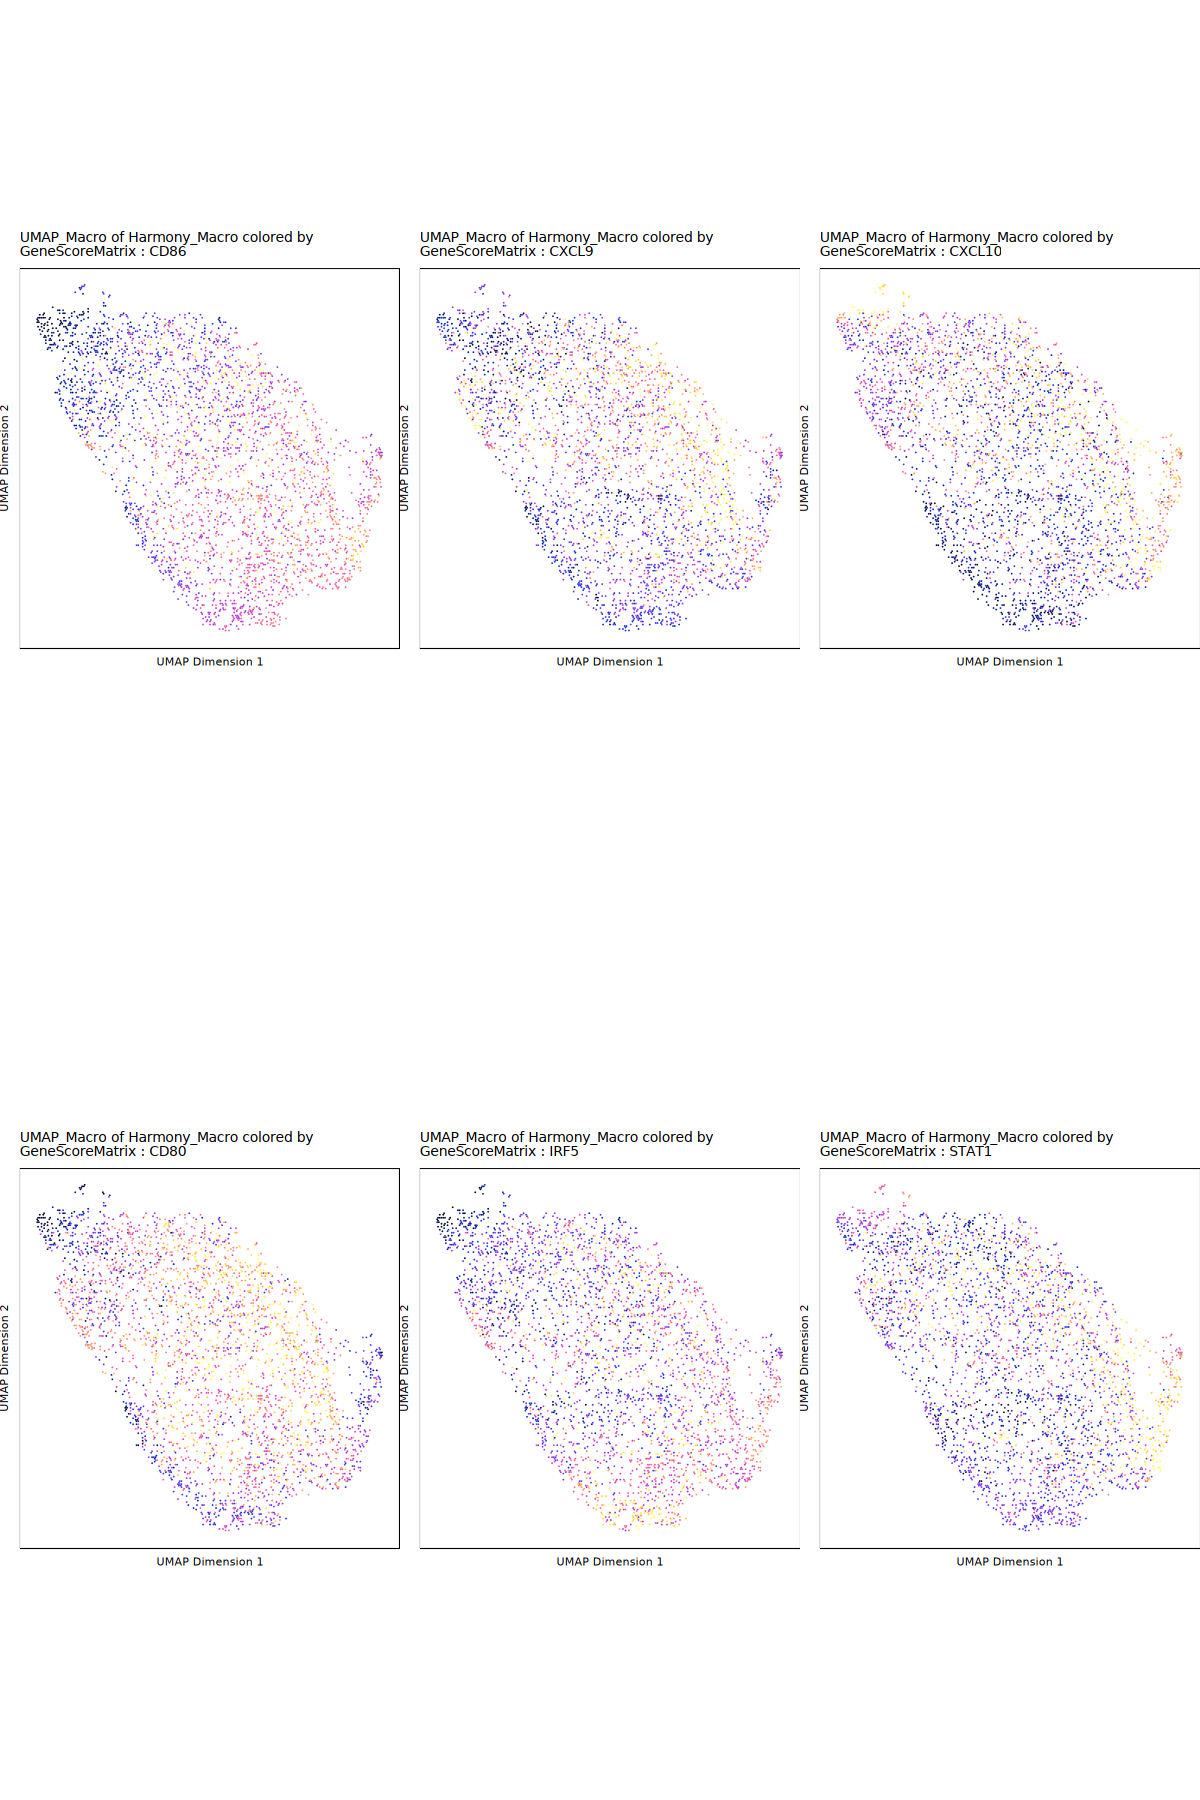

In [13]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Macro",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj_sub)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b6213af39113-Date-2025-04-22_Time-07-14-33.475315.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-22 07:14:33.738901 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b6213af39113-Date-2025-04-22_Time-07-14-33.475315.log



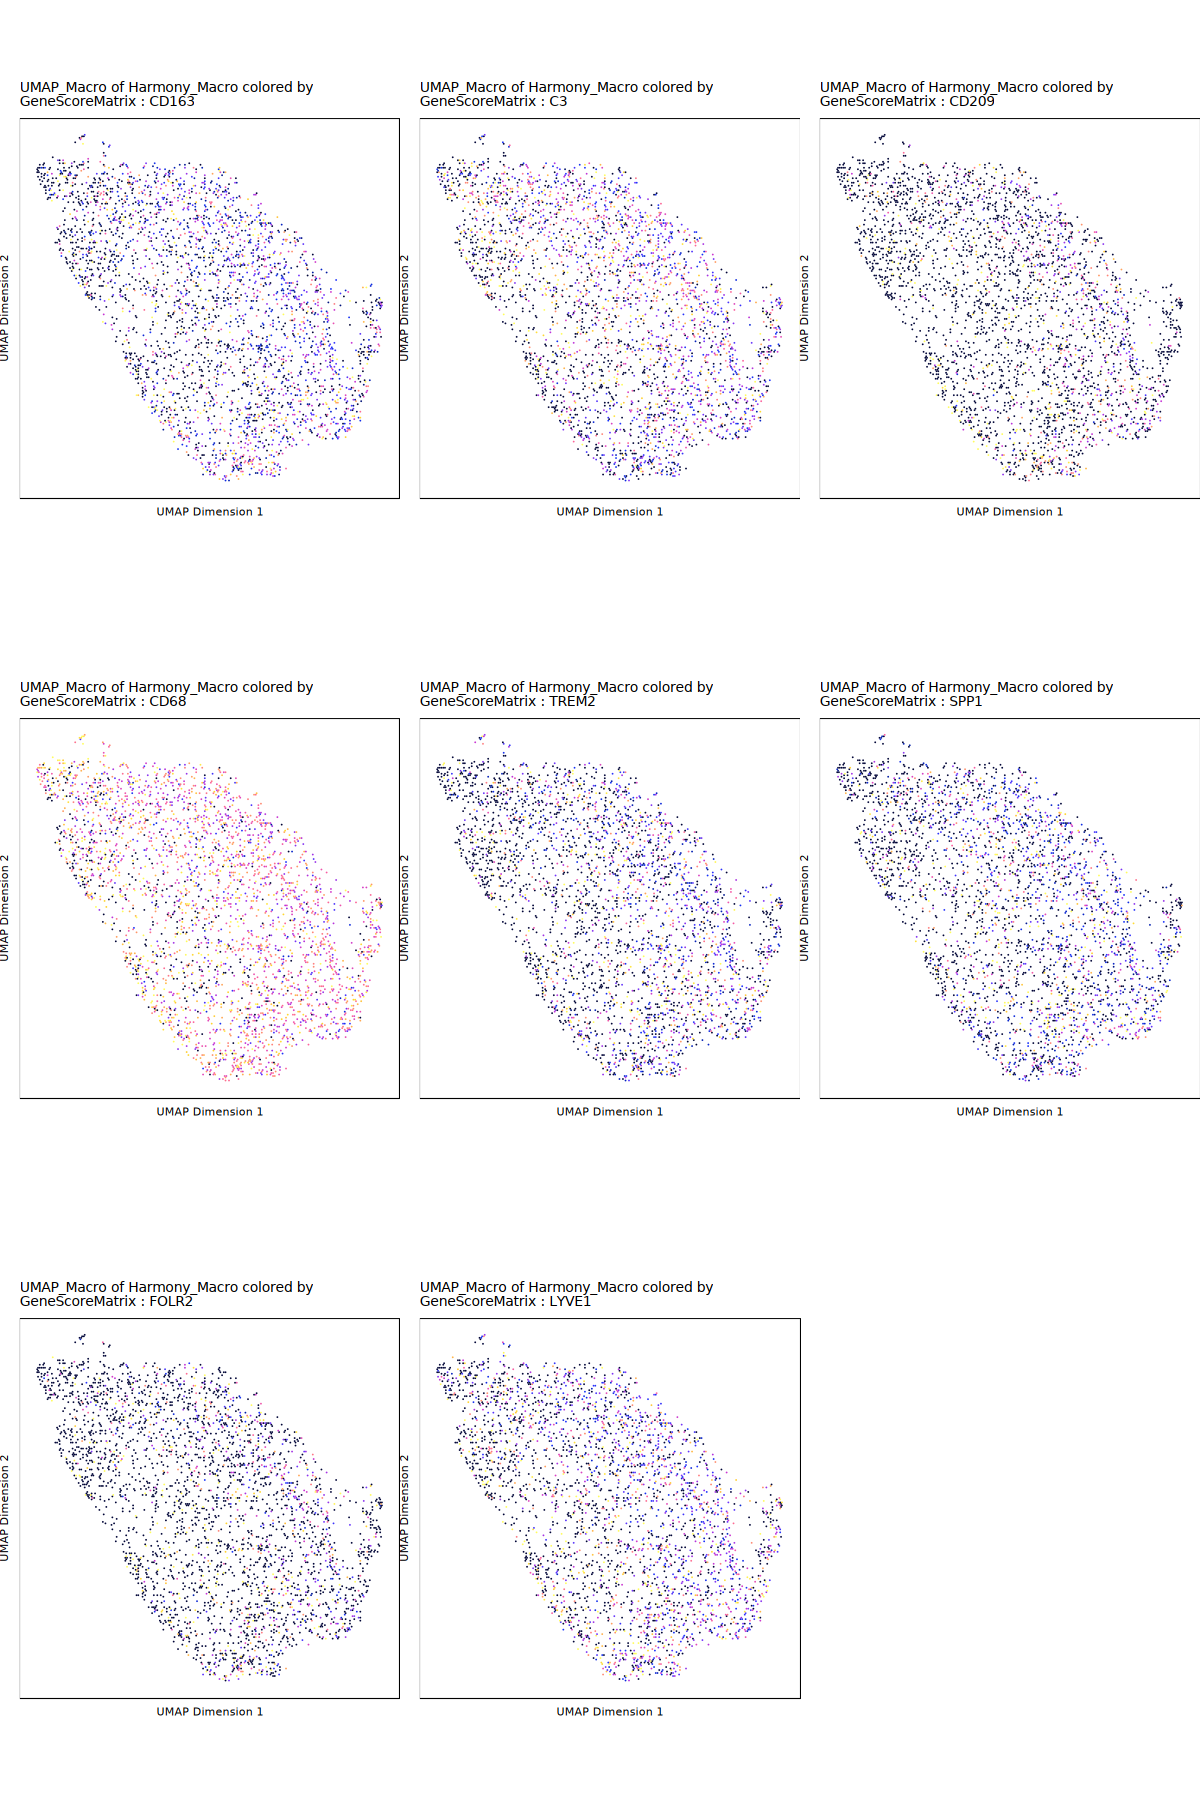

In [14]:
# M2
markerGenes <- c(
 "CD163", "C3",  "CD209", "CD68", "TREM2", "SPP1", "FOLR2", "LYVE1"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Macro",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b6215ab6a4a-Date-2025-04-22_Time-07-14-44.087504.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-22 07:14:44.347248 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b6215ab6a4a-Date-2025-04-22_Time-07-14-44.087504.log



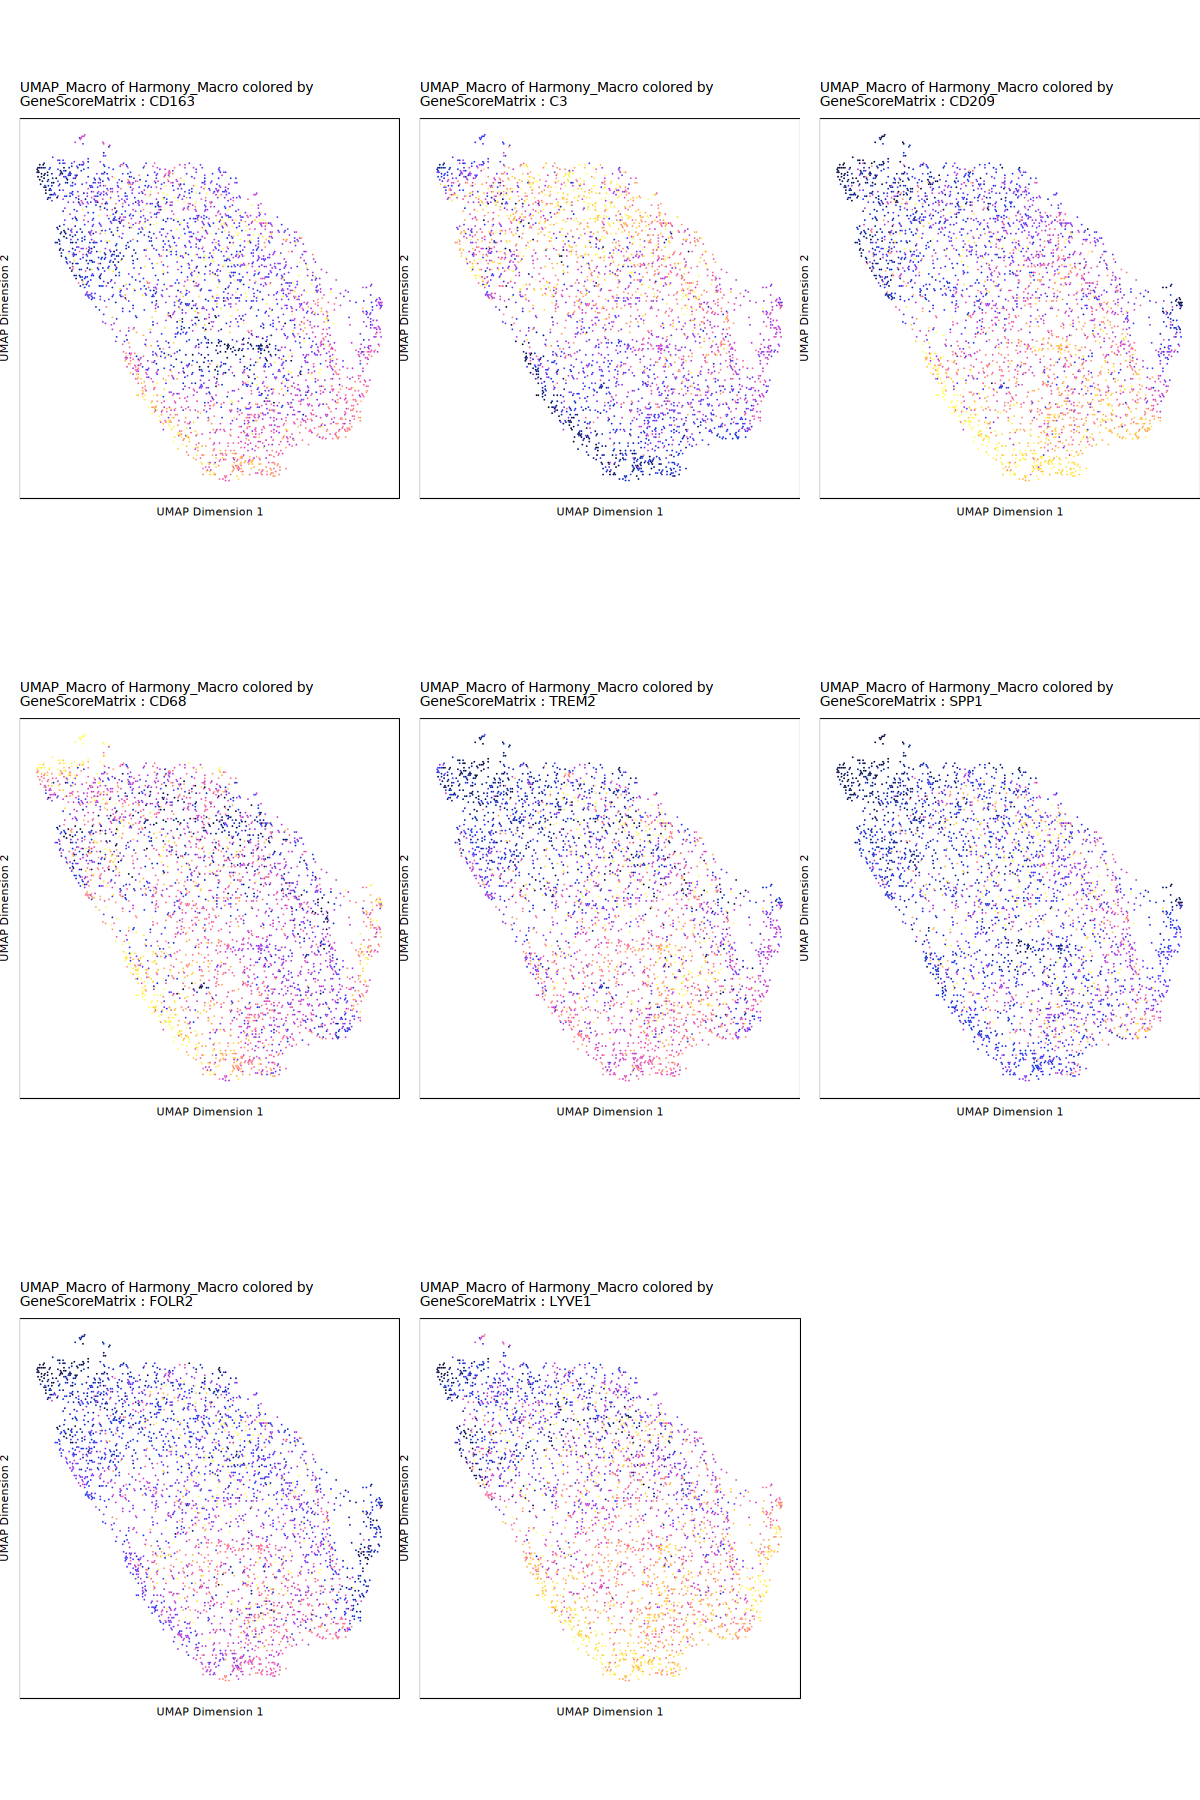

In [15]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Macro",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj_sub)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [16]:
# markersGS <- getMarkerFeatures(
#     ArchRProj = proj_sub,
#     useMatrix = "GeneScoreMatrix",
#     groupBy = "clusters_Macro",
#     bias = c("TSSEnrichment", "log10(nFrags)"),
#     testMethod = "wilcoxon"
#     )

In [17]:
# saveRDS(markersGS,file = "./ArchRProject_Myeloid/markersGS_MacroCluster.rds" )

In [18]:
markersGS <- readRDS(file = "./ArchRProject_Myeloid/markersGS_MacroCluster.rds")

In [19]:
# markerPK <- getMarkerFeatures(
#     ArchRProj = proj_sub,
#     useMatrix = "PeakMatrix", 
#     groupBy = "clusters_Macro",
#     bias = c("TSSEnrichment", "log10(nFrags)"),
#     testMethod = "wilcoxon"
# )

In [20]:
# saveRDS(markerPK, file = "./ArchRProject_Myeloid/markerPK_MacroCluster.rds")

In [21]:
markerPK <- readRDS(file = "./ArchRProject_Myeloid/markerPK_MacroCluster.rds")

In [22]:
markerGenes <- c(
    "CD86", "CXCL9", "CXCL10", "CD80", "IRF5", "STAT1", #M1
    "CD163", "C3",  "CD209", "CD68", "TREM2", "SPP1", "FOLR2", "LYVE1" # M2
)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-20b6213ee46910-Date-2025-04-22_Time-07-15-04.463831.log
If there is an issue, please report to github with logFile!



Printing Top Marker Genes:

C1:

	GABRD, RNVU1-17, NBPF15, CASC23, GUCY1A2, MIR615, MIR6758, SLC5A8, PRR20B, LINC00460, SOX1, SERPINA3, CHRNA7, HBQ1, TMC5

C2:

	OR6P1, SPATA46, SPATA17-AS1, GJC2, PARD3-AS1, KCNQ1DN, NLRP10, OR5W2, OR5A1, RAB38, SCARNA9, TAS2R19, LINC00443, ACTC1, DNAJA4

C3:

	GABRD, MIR6728, MIR4695, UBXN10, CDA, MIR3605, SLC1A7, IFI44L, KCND3-IT1, RNVU1-17, NBPF15, S100A12, OR6P1, KLHDC9, FCGR2C

C4:

	CDX2, ZNF154, SLC16A8, C7orf77, SRPK3, GABRD, MIR6728, MIR4695, UBXN10, CDA, MIR3605, SLC1A7, IFI44L, KCND3-IT1, RNVU1-17

C5:

	MIR4695, WNT9A, PPP1R3C, MUC5AC, ZNF214, NLRP14, RBFOX1, WSCD1, CETN1, NCCRP1, AGAP1-IT1, NINL, LAMA5-AS1, TPTEP1, LINC01060

C6:

	UBXN10, SLC1A7, KRTAP5-9, THRSP, TMPRSS5, LINC02395, MIR337, SNORD114-28, KRT24, KRTAP4-9, KRTAP4-2, SKOR2, MATK, SULT1C3, MIR124-3

C7:

	KCND3-IT1, LINC01031, ZNF215, SAAL1, MS4A18, LRP6, RNASE7, LINC02308, STRA6, MIR7-2, SHISA6, LGALS9C, LGALS9B, LOC100505782, SELENOV

C8:

	MIR3605, IFI44L, FCGR2C, FCGR3B, T

 [1] "CD86"   "CXCL9"  "CXCL10" "CD80"   "IRF5"   "STAT1"  "CD163"  "C3"    
 [9] "CD209"  "CD68"   "TREM2"  "SPP1"   "FOLR2"  "LYVE1" 


Preparing Main Heatmap..




************************************************************
2025-04-22 07:15:05.514186 : ERROR Found in .ArchRHeatmap for  
LogFile = ArchRLogs/ArchR-plotMarkerHeatmap-20b6213ee46910-Date-2025-04-22_Time-07-15-04.463831.log

<simpleError in `class<-`(unlist(lapply(x, as.unit), recursive = FALSE), c("unit",     "unit_v2")): attempt to set an attribute on NULL>

************************************************************



ERROR: Error in .logError(e, fn = ".ArchRHeatmap", info = "", errorList = errorList, : Exiting See Error Above


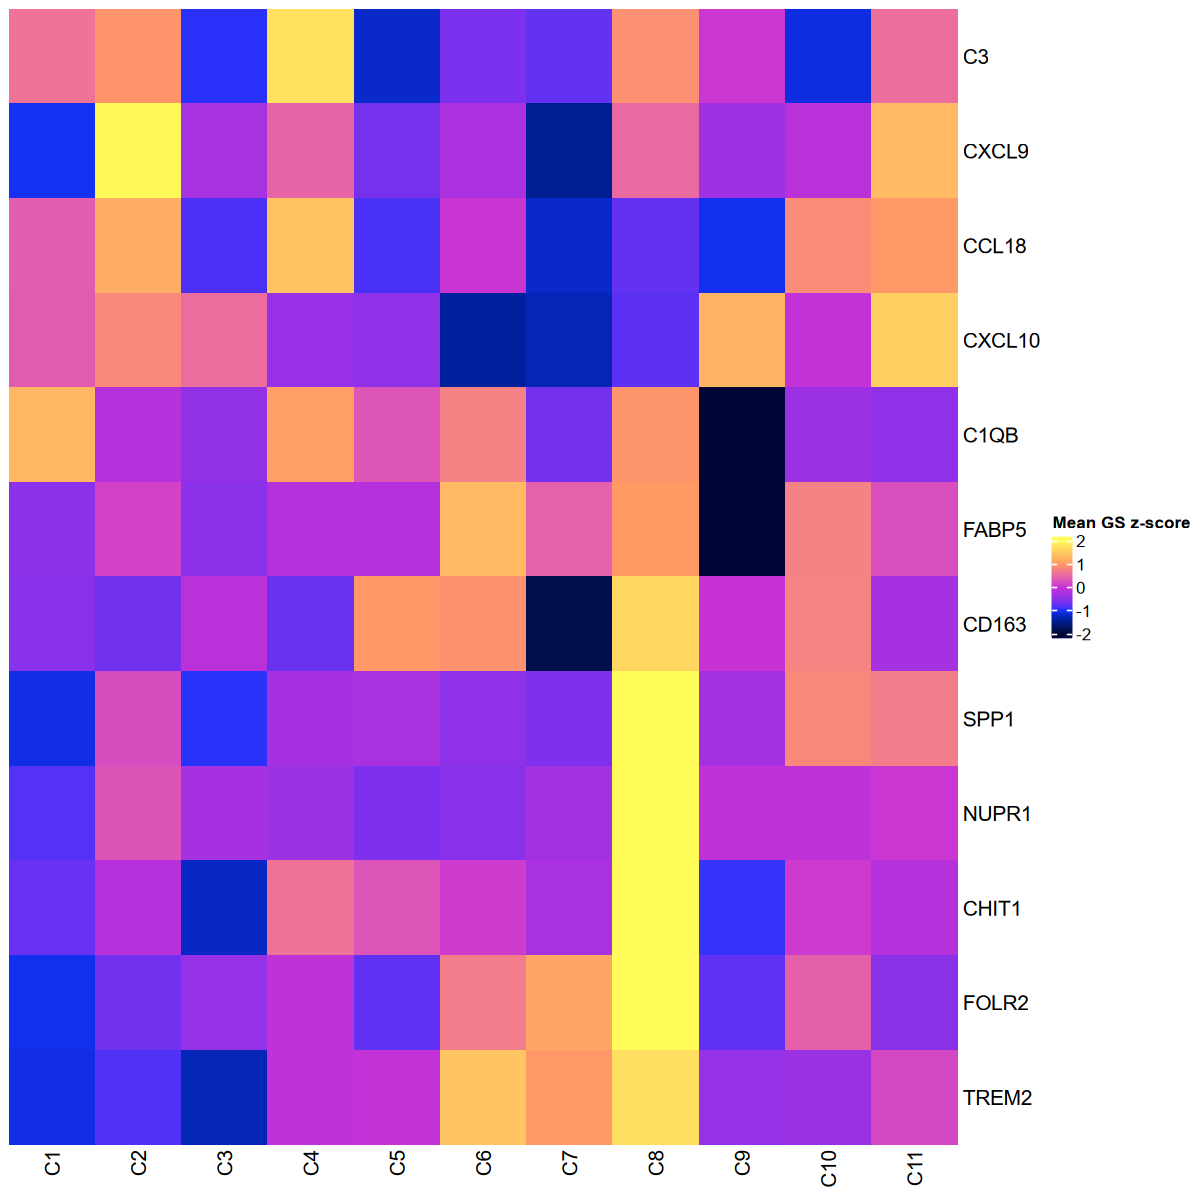

In [23]:
markerGenes <- c(
    "CD163", "FOLR2", "C1QB", "SEPP1", # FOLR2+
    "SPP1", "TREM2", "FABP5", "NUPR1", # TREM2+
    "CXCL9", "CXCL10", "CCL18", "CHIT1", "C3"
)

idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数de
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [24]:
mtx

C1         C2         C3         C4          C5          C6         
C1QB    1.2918452 -0.1679120 -0.4663714  1.05096874  0.28803699  0.75009852
CHIT1  -0.7361932 -0.1750667 -1.2470971  0.58468529  0.28249976  0.07368796
FOLR2  -1.0747075 -0.6858523 -0.4471055 -0.08052855 -0.79022338  0.69247921
CD163  -0.5481361 -0.6849775 -0.1314940 -0.73430768  0.99222114  0.92084186
NUPR1  -0.8358837  0.2737949 -0.2962216 -0.38094859 -0.61256551 -0.54304769
CCL18   0.3644854  1.1831428 -0.8755499  1.41510557 -0.87831660  0.01822268
C3      0.5917897  0.9574339 -0.9695925  1.70932693 -1.22990989 -0.63344834
CXCL9  -1.0277276  1.9539896 -0.2899384  0.44112177 -0.66595643 -0.26112787
CXCL10  0.3584392  0.8333295  0.5225215 -0.42744324 -0.50292498 -1.44085576
SPP1   -1.0971323  0.2101448 -0.9733919 -0.30610167 -0.28001264 -0.50356286
TREM2  -1.0976208 -0.8562944 -1.3299012 -0.09186753 -0.05392803  1.43553067
FABP5  -0.5280343  0.1185247 -0.5194216 -0.17711803 -0.16959389  1.31761603
       C7         C8         C9           C10         C11        
C1QB   -0.6790964  0.9545906 -2.136850234 -0.39336080 -0.49194916
CHIT1  -0.2714063  2.5401565 -0.939991522  0.06518458 -0.17645929
FOLR2   1.1240518  2.1790822 -0.780629237  0.39735757 -0.53392423
CD163  -1.8779019  1.6203329 -0.004370326  0.76663399 -0.31884251
NUPR1  -0.3397298  2.8625921 -0.069296023 -0.08831466  0.02962061
CCL18  -1.2255242 -0.7714845 -1.065732672  0.85168973  0.98396160
C3     -0.7712196  0.9012992  0.036900729 -1.12490477  0.53232459
CXCL9  -1.4882873  0.4922432 -0.357099337 -0.11526668  1.31804913
CXCL10 -1.3209310 -0.8010693  1.267480870 -0.03706088  1.54851412
SPP1   -0.6192519  2.3966626 -0.332810801  0.81412698  0.69132969
TREM2   0.9877126  1.6909750 -0.444579575 -0.40270145  0.16267476
FABP5   0.4005762  1.0052517 -2.421077818  0.74629589  0.22698112

In [90]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "GeneScoreMatrix",
    groupBy = "neoadjuvant",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
    )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-20b621506741e2-Date-2025-04-22_Time-11-01-18.981054.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2025-04-22 11:01:19.237982 : Matching Known Biases, 0.003 mins elapsed.

###########
2025-04-22 11:03:26.815992 : Completed Pairwise Tests, 2.129 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-20b621506741e2-Date-2025-04-22_Time-11-01-18.981054.log



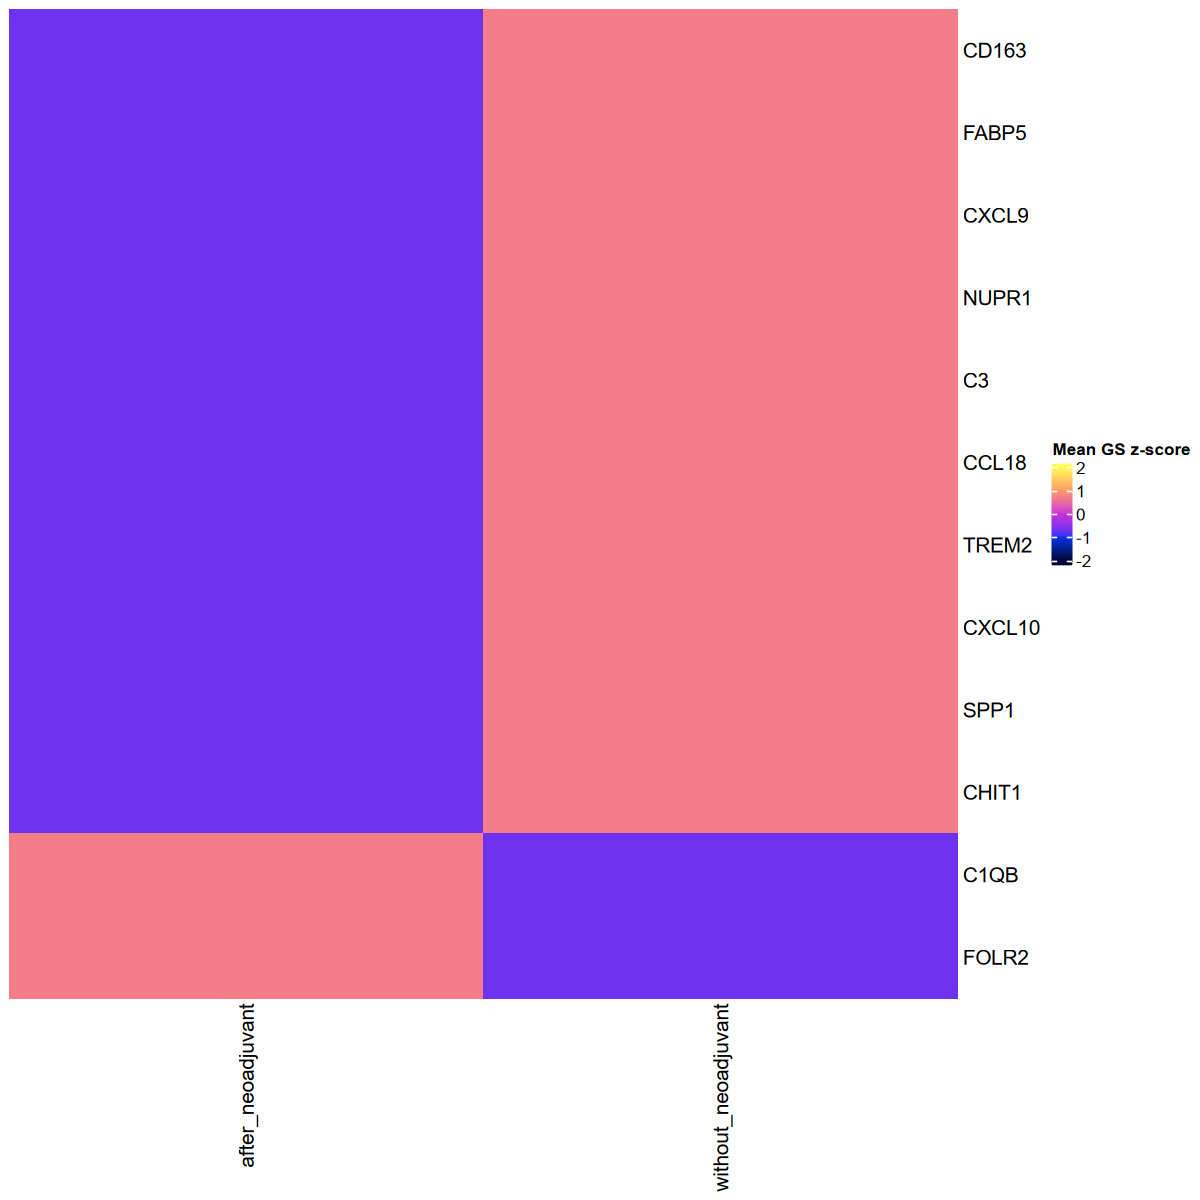

In [92]:
markerGenes <- c(
    "CD163", "FOLR2", "C1QB", "SEPP1", # FOLR2+
    "SPP1", "TREM2", "FABP5", "NUPR1", # TREM2+
    "CXCL9", "CXCL10", "CCL18", "CHIT1", "C3"
)

idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数de
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [25]:
markerGenes <- c(
     "SPP1", "C1QB", "LPL", "MS4A4A", "VSIG4", "SDSL", "FOLR2",
     "CXCL9", "CXCL10", "CCL18", "CHIT1", "CMKLR1", "GAL3ST4", "RAB42"
)

p  <- plotBrowserTrack(
    ArchRProj = proj_sub,
    groupBy = "clusters_Macro",
    geneSymbol = markerGenes,
    upstream = 50000,
    downstream = 50000
    )
plotPDF(p, name = "Macrocluster_track",ArchRProj = proj_sub, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-20b621dc6d5d7-Date-2025-04-22_Time-07-17-31.089673.log
If there is an issue, please report to github with logFile!

2025-04-22 07:17:31.181252 : Validating Region, 0.002 mins elapsed.



GRanges object with 14 ranges and 2 metadata columns:
       seqnames              ranges strand |     gene_id      symbol
          <Rle>           <IRanges>  <Rle> | <character> <character>
   [1]     chr4   87975650-87983426      + |        6696        SPP1
   [2]     chr1   22652762-22661538      + |         713        C1QB
   [3]     chr8   19901717-19967258      + |        4023         LPL
   [4]    chr11   60280541-60308972      + |       51338      MS4A4A
   [5]     chrX   66021738-66040125      - |       11326       VSIG4
   ...      ...                 ...    ... .         ...         ...
  [10]    chr17   36064280-36072032      + |        6362       CCL18
  [11]     chr1 203212827-203272809      - |        1118       CHIT1
  [12]    chr12 108288044-108339341      - |        1240      CMKLR1
  [13]     chr7 100159244-100168750      - |       79690     GAL3ST4
  [14]     chr1   28592200-28595443      + |      115273       RAB42
  -------
  seqinfo: 24 sequences from hg38 genom

2025-04-22 07:17:31.280177 : Adding Bulk Tracks (1 of 14), 0.003 mins elapsed.

2025-04-22 07:17:36.513081 : Adding Feature Tracks (1 of 14), 0.09 mins elapsed.

2025-04-22 07:17:36.623562 : Adding Gene Tracks (1 of 14), 0.092 mins elapsed.

2025-04-22 07:17:39.832973 : Plotting, 0.146 mins elapsed.

2025-04-22 07:17:41.07922 : Adding Bulk Tracks (2 of 14), 0.167 mins elapsed.

2025-04-22 07:17:47.88646 : Adding Feature Tracks (2 of 14), 0.28 mins elapsed.

2025-04-22 07:17:47.961585 : Adding Gene Tracks (2 of 14), 0.281 mins elapsed.

2025-04-22 07:17:48.288682 : Plotting, 0.287 mins elapsed.

2025-04-22 07:17:49.842966 : Adding Bulk Tracks (3 of 14), 0.313 mins elapsed.

2025-04-22 07:17:54.460283 : Adding Feature Tracks (3 of 14), 0.39 mins elapsed.

2025-04-22 07:17:54.536523 : Adding Gene Tracks (3 of 14), 0.391 mins elapsed.

2025-04-22 07:17:54.842947 : Plotting, 0.396 mins elapsed.

2025-04-22 07:17:58.169008 : Adding Bulk Tracks (4 of 14), 0.451 mins elapsed.

2025-04-22 07:17

NULL
_msg_send errno: 4 strerror: Interrupted system call


Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



L


Plotting Gtable!



NULL


Plotting Gtable!



NULL


In [26]:
cell_annotations <- list(
    "CXCL9+" = paste0("C", c(2, 3, 4, 9, 11)), # 预后好
    "SPP1+" = paste0("C", c(1, 5, 6, 7, 8, 10)) # 预后不好
)

In [27]:
cell_annotations_2 <- list(
    "Macro_SPP1" = paste0("C", c(5, 8, 10)), 
    "Macro_CXCL10" = paste0("C", c(2, 3, 9, 11)),
    "Macro_FOLR2" = paste0("C", c(6, 7)),
    "Macro_C3" = paste0("C", c(1, 4))
)

In [28]:
## 根据cell——annotations和proj$Clusters创建proj$cellType列
# 对于cell_annotations中的每一个元素（细胞类型）返回proj$Clusters中对应的索引
idz <- lapply(cell_annotations, function(x) which(proj_sub$clusters_Macro %in% x))
# 创建proj$cellType列，长度为proj@cellColData的行数，初始化为NA
proj_sub$MacroType <- rep(NA, nrow(proj_sub@cellColData))
# 遍历idz中的每一个元素，将proj$cellType中对应的索引赋值为元素的名称
for(i in names(idz)){proj_sub$MacroType[idz[[i]]] <- i}

In [29]:
## 根据cell——annotations和proj$Clusters创建proj$cellType列
# 对于cell_annotations中的每一个元素（细胞类型）返回proj$Clusters中对应的索引
idz <- lapply(cell_annotations_2, function(x) which(proj_sub$clusters_Macro %in% x))
# 创建proj$cellType列，长度为proj@cellColData的行数，初始化为NA
proj_sub$MacroType2 <- rep(NA, nrow(proj_sub@cellColData))
# 遍历idz中的每一个元素，将proj$cellType中对应的索引赋值为元素的名称
for(i in names(idz)){proj_sub$MacroType2[idz[[i]]] <- i}

In [30]:
table(proj_sub$MacroType)


CXCL9+  SPP1+ 
  1597   1727 

In [31]:
table(proj_sub$MacroType2)


    Macro_C3 Macro_CXCL10  Macro_FOLR2   Macro_SPP1 
         607         1294          612          811 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b6215a1d242d-Date-2025-04-22_Time-09-04-29.649807.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b6215a1d242d-Date-2025-04-22_Time-09-04-29.649807.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b621780b45fc-Date-2025-04-22_Time-09-04-30.207955.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b621780b45fc-Date-2025-04-22_Time-09-04-30.207955.log



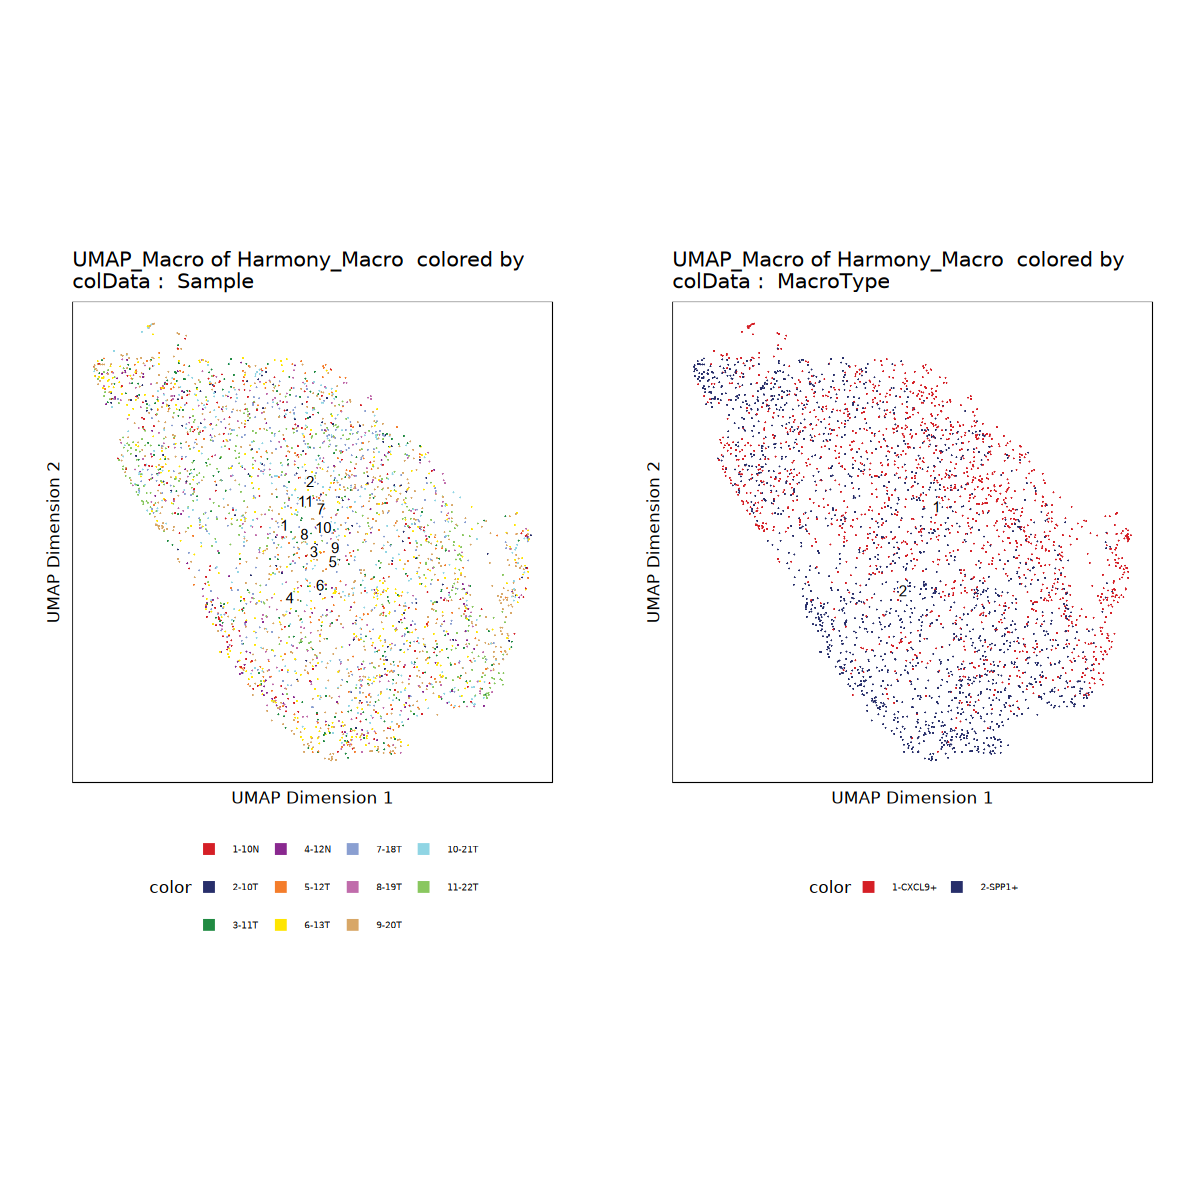

In [59]:
p1 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Macro"
    )
p2 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "MacroType", 
    embedding = "UMAP_Macro"
    )
ggAlignPlots(p1, p2, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b621429780ab-Date-2025-04-22_Time-09-05-41.934164.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b621429780ab-Date-2025-04-22_Time-09-05-41.934164.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-20b62161e76b10-Date-2025-04-22_Time-09-05-42.412605.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-20b62161e76b10-Date-2025-04-22_Time-09-05-42.412605.log



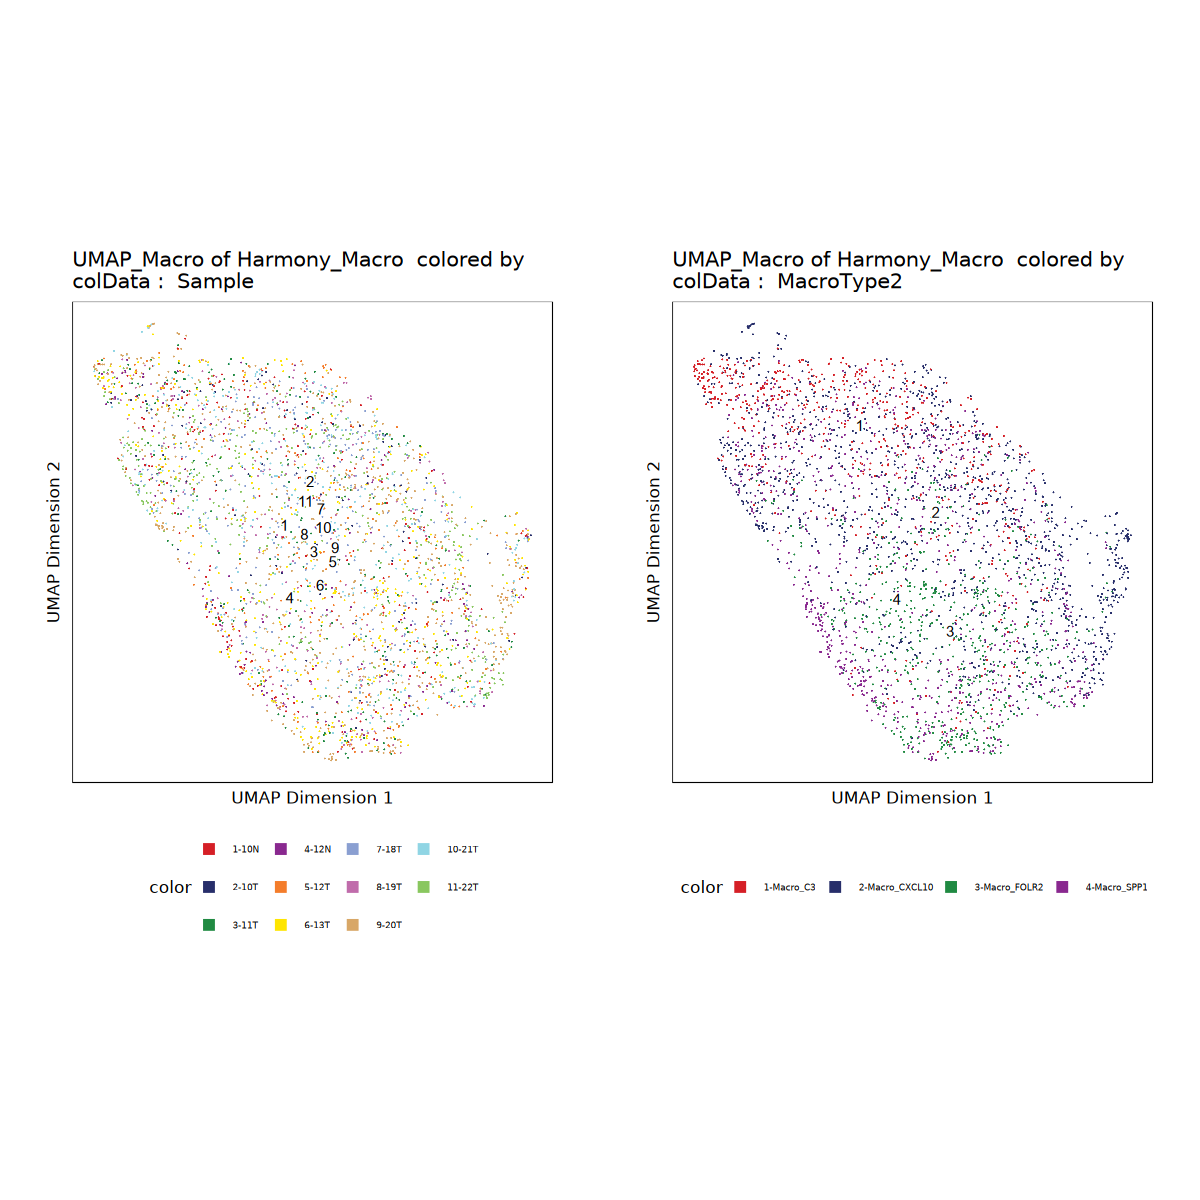

In [61]:
p1 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Macro"
    )
p2 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "MacroType2", 
    embedding = "UMAP_Macro"
    )
ggAlignPlots(p1, p2 ,type = "h")

In [34]:
new_order <- c(
    "SPP1+" , "CXCL9+" 
)

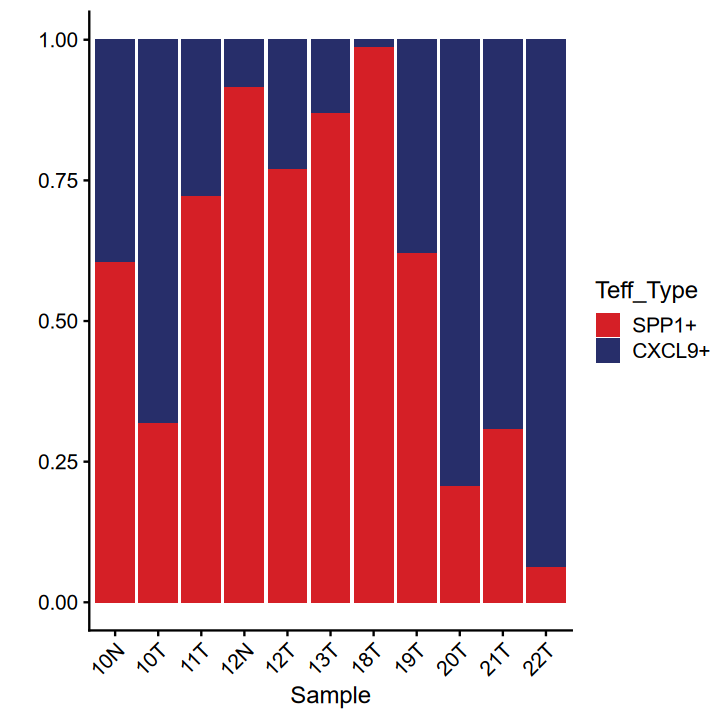

In [35]:
# 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj_sub$Sample, proj_sub$MacroType)
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
df_sample$Var2 <- factor(df_sample$Var2, levels = new_order)
cols <- ArchR::paletteDiscrete(df_sample$Var2)

# 创建堆叠图
p <- ggplot(df_sample, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +
  xlab("Sample") +
  ylab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "Teff_Type")

options(repr.plot.width = 6, repr.plot.height = 6)
# ggsave("/data/hanxue/BCY_ATAC/joint_output/Sample-CellType-Distribution.svg",plot = p, width = 6, height = 6, device = "svg")
p

In [36]:
new_order <- c(
    "Macro_SPP1" , "Macro_CXCL10", "Macro_C3", "Macro_FOLR2" 
)

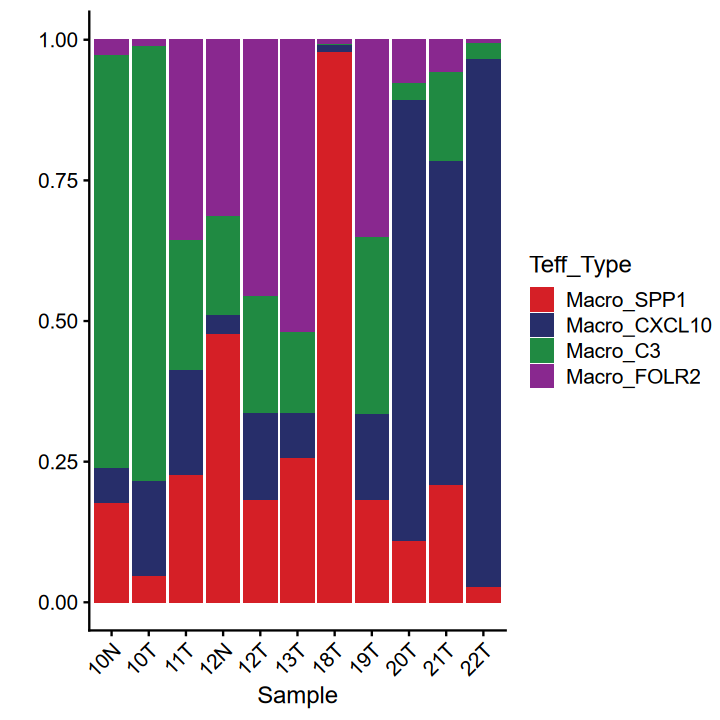

In [37]:
# 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj_sub$Sample, proj_sub$MacroType2)
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
df_sample$Var2 <- factor(df_sample$Var2, levels = new_order)
cols <- ArchR::paletteDiscrete(df_sample$Var2)

# 创建堆叠图
p <- ggplot(df_sample, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +
  xlab("Sample") +
  ylab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "Teff_Type")

options(repr.plot.width = 6, repr.plot.height = 6)
# ggsave("/data/hanxue/BCY_ATAC/joint_output/Sample-CellType-Distribution.svg",plot = p, width = 6, height = 6, device = "svg")
p

In [38]:
# 获取并转换细胞元数据
cell_stats <- getCellColData(proj_sub) %>%
  as.data.frame() %>%
  group_by(Sample, MacroType) %>% 
  summarise(Count = n()) %>%
  tidyr::pivot_wider(names_from = MacroType, values_from = Count, values_fill = 0) %>%
  mutate(Total = rowSums(across(where(is.numeric))))  # 计算所有数值列的总和
# 查看结果
cell_stats

`summarise()` has grouped output by 'Sample'. You can override using the
`.groups` argument.


Sample CXCL9+ SPP1+ Total
1  10N     88    134   222  
2  10T     73     34   107  
3  11T     69    179   248  
4  12N     12    129   141  
5  12T     55    183   238  
6  13T     51    336   387  
7  18T      4    303   307  
8  19T     97    158   255  
9  20T    533    138   671  
10 21T    246    109   355  
11 22T    369     24   393

In [39]:
# 检查选定基因的位点可及性
gene_list <- c("SPP1", "FOLR2", "CD163", "C1QB", "CXCL9", "CXCL10", "CD86", "CCL2")

p <- plotBrowserTrack(
    ArchRProj = proj_sub,
    groupBy = "neoadjuvant",
    geneSymbol = gene_list, 
    upstream = 50000,
    downstream = 50000
)

plotPDF(p, name = "Macro_neoadjuvant_track",ArchRProj = proj_sub, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-20b6215532b534-Date-2025-04-22_Time-07-18-53.186468.log
If there is an issue, please report to github with logFile!



2025-04-22 07:18:53.27792 : Validating Region, 0.002 mins elapsed.



GRanges object with 8 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4   87975650-87983426      + |        6696        SPP1
  [2]    chr11   72216601-72221950      + |        2350       FOLR2
  [3]    chr12     7470813-7503893      - |        9332       CD163
  [4]     chr1   22652762-22661538      + |         713        C1QB
  [5]     chr4   76001275-76007488      - |        4283       CXCL9
  [6]     chr4   76021117-76023497      - |        3627      CXCL10
  [7]     chr3 122055366-122121139      + |         942        CD86
  [8]    chr17   34255285-34257203      + |        6347        CCL2
  -------
  seqinfo: 24 sequences from hg38 genome


2025-04-22 07:18:53.366422 : Adding Bulk Tracks (1 of 8), 0.003 mins elapsed.

2025-04-22 07:18:54.93308 : Adding Feature Tracks (1 of 8), 0.029 mins elapsed.

2025-04-22 07:18:55.007706 : Adding Gene Tracks (1 of 8), 0.03 mins elapsed.

2025-04-22 07:18:55.562966 : Plotting, 0.04 mins elapsed.

2025-04-22 07:18:56.0085 : Adding Bulk Tracks (2 of 8), 0.047 mins elapsed.

2025-04-22 07:18:57.540609 : Adding Feature Tracks (2 of 8), 0.073 mins elapsed.

2025-04-22 07:18:57.620718 : Adding Gene Tracks (2 of 8), 0.074 mins elapsed.

2025-04-22 07:18:57.933404 : Plotting, 0.079 mins elapsed.

2025-04-22 07:18:58.508699 : Adding Bulk Tracks (3 of 8), 0.089 mins elapsed.

2025-04-22 07:19:00.083014 : Adding Feature Tracks (3 of 8), 0.115 mins elapsed.

2025-04-22 07:19:00.162794 : Adding Gene Tracks (3 of 8), 0.116 mins elapsed.

2025-04-22 07:19:00.481071 : Plotting, 0.122 mins elapsed.

2025-04-22 07:19:00.999083 : Adding Bulk Tracks (4 of 8), 0.13 mins elapsed.

2025-04-22 07:19:06.131559 

NULL
_msg_send errno: 4 strerror: Interrupted system call


Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



In [40]:
markerPK <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "PeakMatrix", 
    groupBy = "neoadjuvant",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-20b6212c1f606f-Date-2025-04-22_Time-07-19-23.992027.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Integer.Matrix

2025-04-22 07:19:24.601814 : Matching Known Biases, 0.009 mins elapsed.

###########
2025-04-22 07:21:03.87085 : Completed Pairwise Tests, 1.663 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-20b6212c1f606f-Date-2025-04-22_Time-07-19-23.992027.log



DataFrame with 6 rows and 6 columns
    seqnames       idx              name combinedVars combinedMeans      rank
       <Rle> <integer>       <character>    <numeric>     <numeric> <integer>
f87        z        87 FOXA1.Forkhead_87      68.3331   -0.65523535         1
f86        z        86     Fosl2.bZIP_86      64.1998    0.00507140         2
f1         z         1       AP.1.bZIP_1      63.3041    0.02254696         3
f99        z        99      Fra2.bZIP_99      62.8903    0.00733377         4
f94        z        94 FOXM1.Forkhead_94      62.5174   -0.64134957         5
f88        z        88 FOXA1.Forkhead_88      61.6128   -0.63294138         6


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-20b6212abebdfb-Date-2025-04-22_Time-07-21-05.578166.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

2025-04-22 07:21:05.752077 : Matching Known Biases, 0.002 mins elapsed.

###########
2025-04-22 07:21:10.715854 : Completed Pairwise Tests, 0.084 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-20b6212abebdfb-Date-2025-04-22_Time-07-21-05.578166.log

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


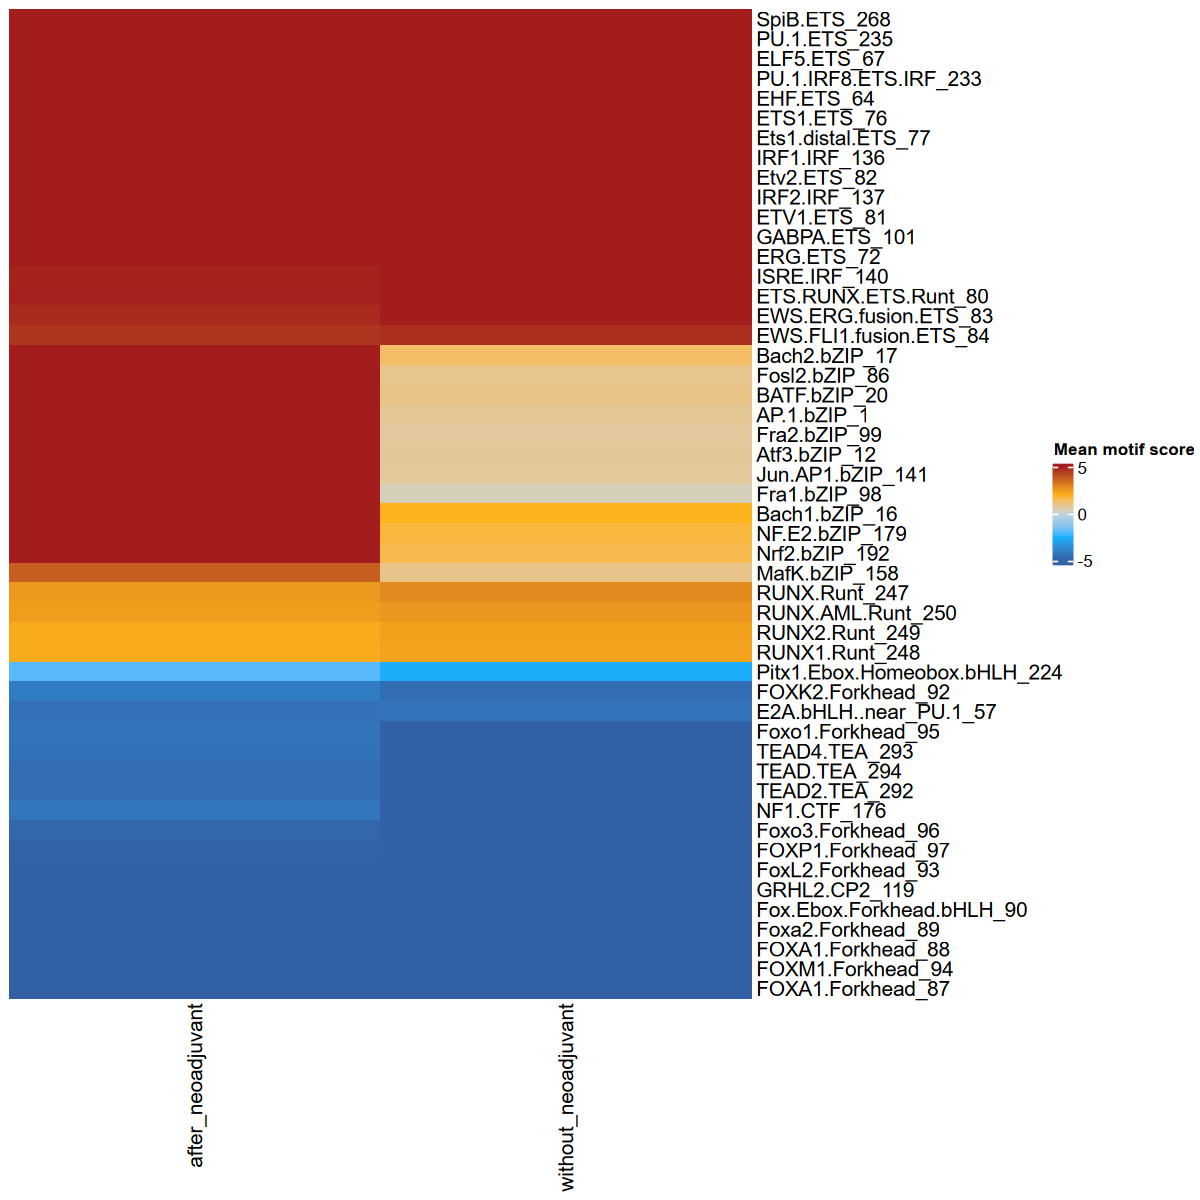

In [41]:
### motif enrichment
VarMotifs <- getVarDeviations(proj_sub, name = "homerMatrix", plot = F)
MotifScoreClusters <- getMarkerFeatures(proj_sub, 
                                        useMatrix = "homerMatrix", 
                                        groupBy = "neoadjuvant",
                                        bias = c("TSSEnrichment", "log10(nFrags)"),
                                        testMethod = "wilcoxon", 
                                        useSeqnames = "z")

fh <- function(x) hclust(dist(x), method="ward.D2")
idy <- which(mcols(MotifScoreClusters)$name %in% VarMotifs$name[c(1:50)])
mtx2 <- assays(MotifScoreClusters[idy,])$Mean %>% `rownames<-`(., mcols(MotifScoreClusters)$name[idy])

col_fun2 <- colorRamp2(c(-5,-2.5,0,2,5), paletteContinuous(set = "solarExtra", n = 5))
ht2 <- Heatmap(mtx2, name = "Mean motif score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun2)
options(repr.plot.width=10, repr.plot.height=10)
p6 <- draw(ht2)

In [42]:
# 治疗后比治疗前更开放的区域
markersPeak1 <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "PeakMatrix",
    groupBy = "neoadjuvant",
    useGroups = "after_neoadjuvant", # 前景组
    bgdGroups = "without_neoadjuvant", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-20b6212876b044-Date-2025-04-22_Time-07-21-11.883457.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Integer.Matrix

2025-04-22 07:21:12.424315 : Matching Known Biases, 0.008 mins elapsed.

2025-04-22 07:21:14.142388 : Computing Pairwise Tests (1 of 1), 0.036 mins elapsed.

Pairwise Test after_neoadjuvant : Seqnames chr1

Pairwise Test after_neoadjuvant : Seqnames chr10

Pairwise Test after_neoadjuvant : Seqnames chr11

Pairwise Test after_neoadjuvant : Seqnames chr12

Pairwise Test after_neoadjuvant : Seqnames chr13

Pairwise Test after_neoadjuvant : Seqnames chr14

Pairwise Test after_neoadjuvant : Seqnames chr15

Pairwise Test after_neoadjuvant : Seqnames chr16

Pairwise Test after_neoadjuvant : Seqnames chr17

Pairwise Test after_neoadjuvant : Seqnames chr18

Pairwise Test after_neoadjuvant : Seqnames chr19

Pairwise Test after_neoadjuvant : Seqnames chr2

Pairwise Test after_neoadjuvant : Seqnames chr20

Pairwise Test after_neoadjuvant : Seqnames chr21

Pairwise Test after_neoadjuvant : Seqnames chr22

Pairwise Test after_neoadjuvant : Seqnames chr3

Pairwise

In [43]:
markersPeak2 <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "PeakMatrix",
    groupBy = "neoadjuvant",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-20b621552c42f4-Date-2025-04-22_Time-07-22-47.016622.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-04-22 07:22:47.565269 : Matching Known Biases, 0.008 mins elapsed.

2025-04-22 07:22:49.243105 : Computing Pairwise Tests (1 of 1), 0.036 mins elapsed.

Pairwise Test without_neoadjuvant : Seqnames chr1

Pairwise Test without_neoadjuvant : Seqnames chr10

Pairwise Test without_neoadjuvant : Seqnames chr11

Pairwise Test without_neoadjuvant : Seqnames chr12

Pairwise Test without_neoadjuvant : Seqnames chr13

Pairwise Test without_neoadjuvant : Seqnames chr14

Pairwise Test without_neoadjuvant : Seqnames chr15

Pairwise Test without_neoadjuvant : Seqnames chr16

Pairwise Test without_neoadjuvant : Seqnames chr17

Pairwise Test without_neoadjuvant : Seqnames chr18

Pairwise Test without_neoadjuvant : Seqnames chr19

Pairwise Test without_neoadjuvant : Seqnames chr2

Pairwise Test

In [44]:
markerList1 <- getMarkers(markersPeak1, cutOff = "FDR <= 0.05 & Log2FC >= 1")
markerList2 <- getMarkers(markersPeak2, cutOff = "FDR <= 0.05 & Log2FC >= 1")

In [45]:
markerList1$after_neoadjuvant

DataFrame with 527 rows and 7 columns
       seqnames       idx     start       end    Log2FC         FDR  MeanDiff
          <Rle> <integer> <integer> <integer> <numeric>   <numeric> <numeric>
121424    chr16      4240  27273755  27274255   2.37267 8.60776e-07  0.151947
161585    chr19      8253  41225554  41226054   1.71136 2.74207e-06  0.249447
154714    chr19      1382   3812311   3812811   1.64216 5.05583e-06  0.185233
161224    chr19      7892  39524422  39524922   1.50165 5.50373e-06  0.193371
310384     chr8      4422  38527268  38527768   2.27295 5.50373e-06  0.147125
...         ...       ...       ...       ...       ...         ...       ...
170511     chr2      4810  36541960  36542460   4.53151   0.0492423 0.0442542
282225     chr6     12830 112016276 112016776   3.70287   0.0492423 0.0240438
286075     chr6     16680 151029872 151030372   2.28960   0.0492423 0.0685647
184977     chr2     19276 174032049 174032549   1.07771   0.0495404 0.2507618
167447     chr2      1746 

In [46]:
peak_after <- data.frame(
  chrom = markerList1$after_neoadjuvant$seqnames,
  start = markerList1$after_neoadjuvant$start,
  end = markerList1$after_neoadjuvant$end
)
peak_gr <- makeGRangesFromDataFrame(
  df = peak_after,
  seqnames.field = "chrom", 
  start.field = "start", 
  end.field = "end"
)

In [54]:
# 对peak进行注释
peakAnno <- annotatePeak(
    peak = peak_gr,
    tssRegion = c(-2000, 2000), 
    TxDb  = TxDb.Hsapiens.UCSC.hg38.knownGene,
    genomicAnnotationPriority = c("Promoter", "Intergenic"),
    annoDb = "org.Hs.eg.db"
    )

>> preparing features information...		 2025-04-22 07:37:41 
>> identifying nearest features...		 2025-04-22 07:37:41 
>> calculating distance from peak to TSS...	 2025-04-22 07:37:41 
>> assigning genomic annotation...		 2025-04-22 07:37:41 
>> adding gene annotation...			 2025-04-22 07:37:41 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-04-22 07:37:41 
>> done...					 2025-04-22 07:37:41 


In [55]:
anno_df <- as.data.frame(peakAnno)
write_xlsx(anno_df, path = "./output/Macro_after_peakanno.xlsx")

In [ ]:
markerList2$without_neoadjuvant

DataFrame with 530 rows and 7 columns
       seqnames       idx     start       end    Log2FC         FDR  MeanDiff
          <Rle> <integer> <integer> <integer> <numeric>   <numeric> <numeric>
151103    chr18      5346  57398188  57398688   5.21750 4.02764e-11 0.1501070
169108     chr2      3407  26493549  26494049   2.22045 2.32761e-08 0.1165160
168287     chr2      2586  20305285  20305785   5.56092 9.50910e-07 0.0924132
321529     chr8     15567 143023985 143024485   1.31014 1.17925e-05 0.1148271
205005    chr21      1566  33400961  33401461   2.30843 1.49129e-05 0.1041733
...         ...       ...       ...       ...       ...         ...       ...
278303     chr6      8908  47308692  47309192   2.46577   0.0493917 0.0485220
227206     chr3     12573 119558849 119559349   2.31981   0.0496242 0.0397226
247559     chr4     11126 139302550 139303050   1.65175   0.0499119 0.0471204
134751    chr17      5531  36082026  36082526   1.73746   0.0499234 0.0422817
283406     chr6     14011 

In [56]:
peak_without <- data.frame(
  chrom = markerList2$without_neoadjuvant$seqnames,
  start = markerList2$without_neoadjuvant$start,
  end = markerList2$without_neoadjuvant$end
)
peak_gr <- makeGRangesFromDataFrame(
  df = peak_without,
  seqnames.field = "chrom", 
  start.field = "start", 
  end.field = "end"
)

In [57]:
# 对peak进行注释
peakAnno <- annotatePeak(
    peak = peak_gr,
    tssRegion = c(-2000, 2000), 
    TxDb  = TxDb.Hsapiens.UCSC.hg38.knownGene,
    genomicAnnotationPriority = c("Promoter", "Intergenic"),
    annoDb = "org.Hs.eg.db"
    )

>> preparing features information...		 2025-04-22 08:20:07 
>> identifying nearest features...		 2025-04-22 08:20:07 
>> calculating distance from peak to TSS...	 2025-04-22 08:20:07 
>> assigning genomic annotation...		 2025-04-22 08:20:07 
>> adding gene annotation...			 2025-04-22 08:20:07 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-04-22 08:20:08 
>> done...					 2025-04-22 08:20:08 


In [58]:
anno_df <- as.data.frame(peakAnno)
write_xlsx(anno_df, path = "./output/Macro_without_peakanno.xlsx")

In [ ]:
# 提取 markerList1$after_neoadjuvant 的结果
stats1 <- data.frame(
  Peak = markerList1$after_neoadjuvant$idx,
  Log2FC = -markerList1$after_neoadjuvant$Log2FC,# 反转 Log2FC 的符号
  FDR = markerList1$after_neoadjuvant$FDR,
  Group = rep("after_neoadjuvant", nrow(markerList1$after_neoadjuvant)),
  seqnames = markerList1$after_neoadjuvant$seqnames,
  start = markerList1$after_neoadjuvant$start,
  end = markerList1$after_neoadjuvant$end
)

# 提取 markerList2$without_neoadjuvant 的结果
stats2 <- data.frame(
  Peak = markerList2$without_neoadjuvant$idx,
  Log2FC = markerList2$without_neoadjuvant$Log2FC,  
  FDR = markerList2$without_neoadjuvant$FDR,
  Group = rep("without_neoadjuvant", nrow(markerList2$without_neoadjuvant)),
  seqnames = markerList2$without_neoadjuvant$seqnames,
  start = markerList2$without_neoadjuvant$start,
  end = markerList2$without_neoadjuvant$end
)

In [ ]:
# 合并数据
combined_stats <- rbind(stats1, stats2)

# 将 FDR 转换为 -log10(FDR) 以便绘图
combined_stats$negLog10FDR <- -log10(combined_stats$FDR)

# 标记显著性
combined_stats$Significance <- ifelse(
  combined_stats$FDR <= 0.05 & abs(combined_stats$Log2FC) >= 1,
  "Significant",
  "Not Significant"
)

In [ ]:
# 分别找出两组中 FDR 最小的五个点
top_after <- stats1[order(stats1$FDR), ][1:5, ]
top_without <- stats2[order(stats2$FDR), ][1:5, ]

In [ ]:
top_after

Peak Log2FC    FDR          Group             seqnames start    end     
1 4240 -2.372672 8.607756e-07 after_neoadjuvant chr16    27273755 27274255
2 8253 -1.711362 2.742069e-06 after_neoadjuvant chr19    41225554 41226054
3 1382 -1.642157 5.055829e-06 after_neoadjuvant chr19     3812311  3812811
4 7892 -1.501655 5.503733e-06 after_neoadjuvant chr19    39524422 39524922
5 4422 -2.272948 5.503733e-06 after_neoadjuvant chr8     38527268 38527768

In [ ]:
top_after$negLog10FDR <- -log10(top_after$FDR)  
top_without$negLog10FDR <- -log10(top_without$FDR)  

# 标记显著性
top_after$Significance <- ifelse(
  top_after$FDR <= 0.05 & abs(top_after$Log2FC) >= 1.25,
  "Significant",
  "Not Significant"
)

top_without$Significance <- ifelse(
  top_without$FDR <= 0.05 & abs(top_without$Log2FC) >= 1.25,
  "Significant",
  "Not Significant"
)

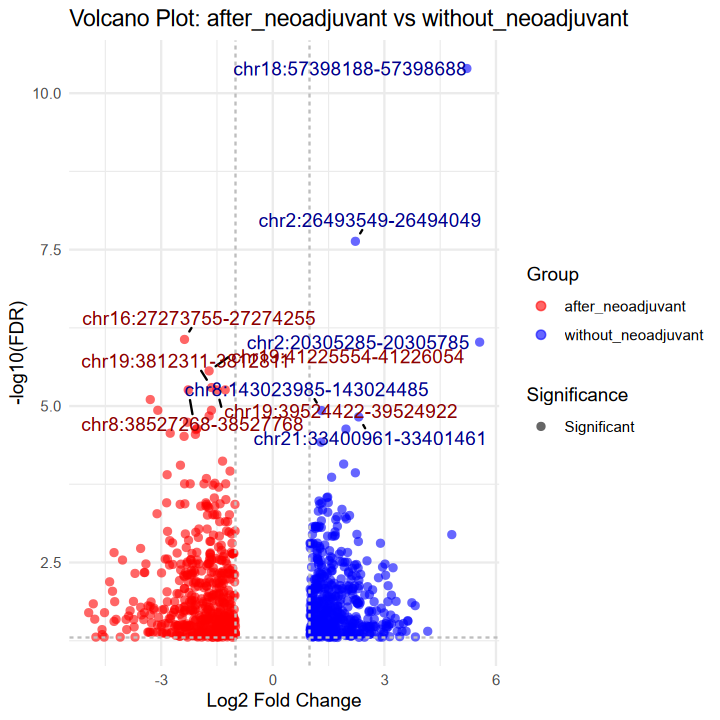

In [ ]:
# 绘制火山图
p <- ggplot(combined_stats, aes(x = Log2FC, y = negLog10FDR, color = Group, shape = Significance)) +
  geom_point(alpha = 0.6, size = 2) +
  scale_color_manual(values = c("after_neoadjuvant" = "red", "without_neoadjuvant" = "blue")) +
  scale_shape_manual(values = c("Significant" = 16, "Not Significant" = 1)) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "gray") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "gray") +
  labs(
    x = "Log2 Fold Change",
    y = "-log10(FDR)",
    title = "Volcano Plot: after_neoadjuvant vs without_neoadjuvant"
  ) +
  theme_minimal() +
  theme(legend.position = "right")

# 添加标注
p <- p + geom_text_repel(
  data = top_after,
  aes(x = Log2FC, y = negLog10FDR, label = paste0(seqnames, ":", start, "-", end)),
  size = 4,
  box.padding = unit(0.5, "lines"),
  point.padding = unit(0.5, "lines"),
  segment.color = "black",
  color = "darkred",
  min.segment.length = 0, # 强制显示所有连线 
  max.overlaps = 6000
)

p <- p + geom_text_repel(
  data = top_without,
  aes(x = Log2FC, y = negLog10FDR, label = paste0(seqnames, ":", start, "-", end)),
  size = 4,
  box.padding = unit(0.5, "lines"),
  point.padding = unit(0.5, "lines"),
  segment.color = "black",
  color = "darkblue",
   min.segment.length = 0, # 强制显示所有连线 
   max.overlaps = 6000
)
# 显示图形
print(p)

In [ ]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "MotifMatrix",
    groupBy = "neoadjuvant",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-4aad74d08c3a3-Date-2025-04-22_Time-02-59-27.343072.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-22 02:59:27.606263 : 

2025-04-22 02:59:27.613882 : Matching Known Biases, 0.003 mins elapsed.

2025-04-22 02:59:27.908355 : Computing Pairwise Tests (1 of 1), 0.008 mins elapsed.

Pairwise Test without_neoadjuvant : Seqnames deviations



In [ ]:
neoMotifResult <- getMarkers(neoMotif, cutOff = "FDR <= 0.05")[[1]]
neoMotifResult <- as.data.frame(neoMotifResult)

In [ ]:
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:20)
top5_positive$name

[1] "CEBPB_140"  "CEBPE_107"  "CEBPD_152"  "CEBPG_128"  "CEBPA_155" 
 [6] "IRF9_636"   "HOXD8_537"  "NAIF1_637"  "IRF8_633"   "DBP_110"   
[11] "HLF_112"    "IRF2_634"   "HMGA1_12"   "ATF2_114"   "PITX2_504" 
[16] "FUBP1_809"  "IRF5_631"   "TOPORS_814" "IRF6_628"   "KDM2B_299"

In [ ]:
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:20)
top5_negative$name

[1] "JUNB_139"    "FOS_137"     "FOSL2_105"   "JUN_143"     "JUND_124"   
 [6] "SMARCC1_651" "FOSL1_142"   "JDP2_125"    "FOSB_121"    "BACH1_130"  
[11] "BACH2_113"   "NFE2_119"    "BATF_129"    "NFE2L2_115"  "MAFF_147"   
[16] "IRF4_632"    "MAFK_149"    "NR4A2_686"   "PAX2_606"    "NR4A1_671"

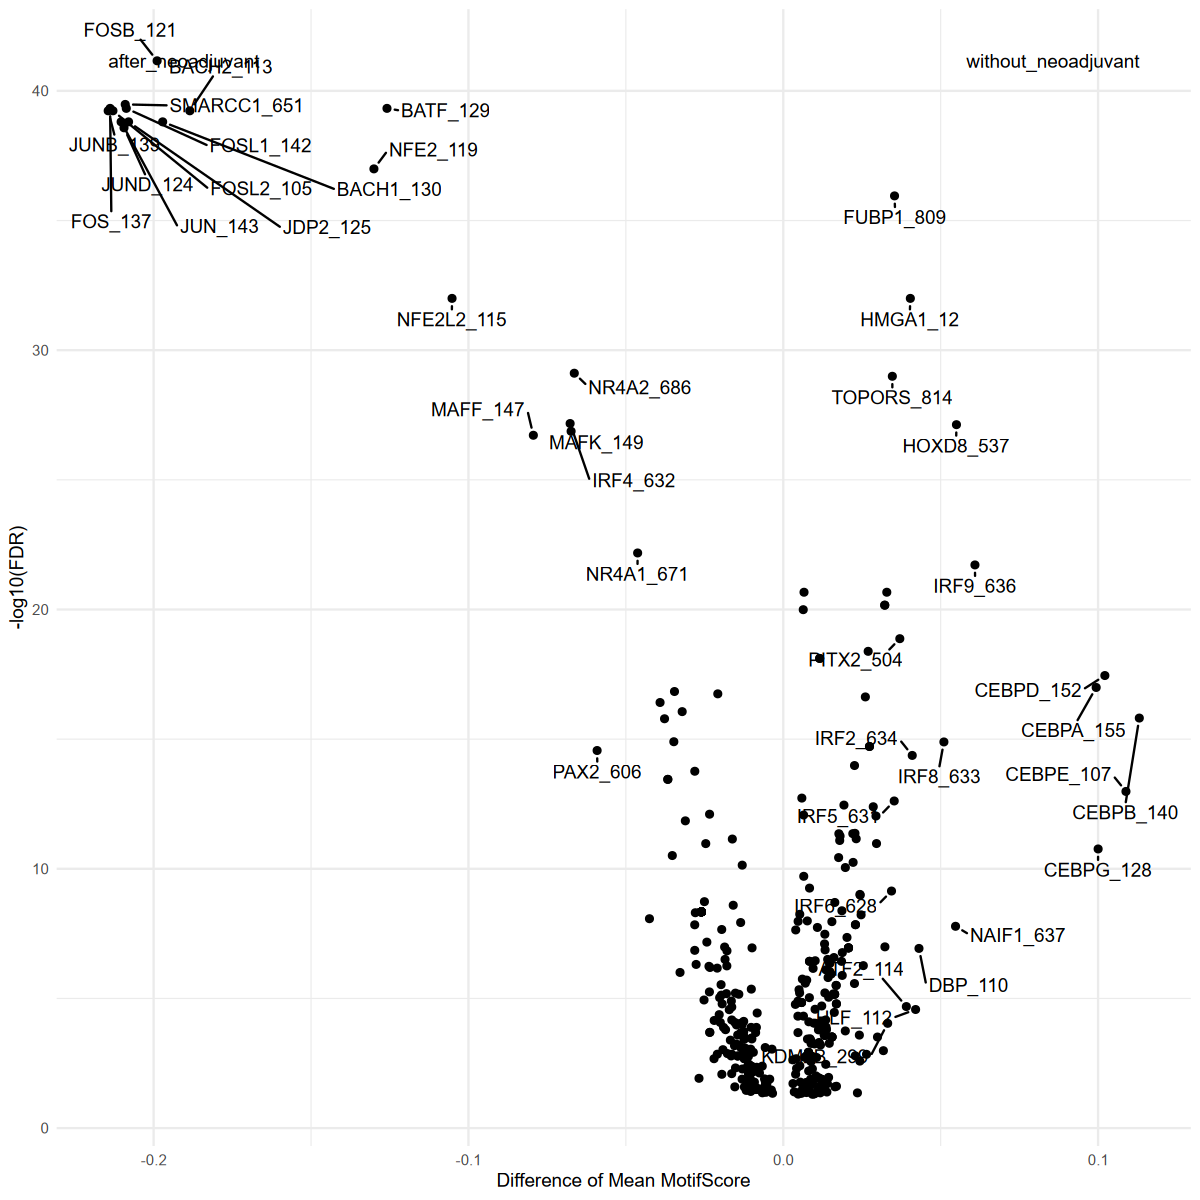

In [ ]:
# MeanDiff > 0 表示 without_neoadjuvant 组的得分高于 after_neoadjuvant 组（图中靠右）。
# MeanDiff < 0 表示 after_neoadjuvant 组的得分高于 without_neoadjuvant 组（图中靠左）。
# 基本火山图
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:20)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:20)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)

#### 筛选正向TF，因为motif具有相似性，确定结合的TF较为困难

In [99]:
seGroupMotif <- getGroupSE(ArchRProj = proj_sub, useMatrix = "MotifMatrix", groupBy = "neoadjuvant")
seGroupMotif

ArchR logging to : ArchRLogs/ArchR-getGroupSE-20b6216397fddd-Date-2025-04-22_Time-13-55-19.932303.log
If there is an issue, please report to github with logFile!



Getting Group Matrix

2025-04-22 13:55:31.10136 : Successfully Created Group Matrix, 0.176 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-20b6216397fddd-Date-2025-04-22_Time-13-55-19.932303.log



class: SummarizedExperiment 
dim: 1740 2 
metadata(0):
assays(1): MotifMatrix
rownames(1740): f1 f2 ... f1739 f1740
rowData names(3): seqnames idx name
colnames(2): after_neoadjuvant without_neoadjuvant
colData names(17): TSSEnrichment ReadsInTSS ... FRIP nCells

In [100]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]

In [101]:
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [102]:
corGSM_MM <- correlateMatrices(
    ArchRProj = proj_sub,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "Harmony_Macro"
)
corGSM_MM

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-20b62114a2c2d9-Date-2025-04-22_Time-13-55-32.9506.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2025-04-22 13:55:36.353132 : Testing 869 Mappings!, 0.057 mins elapsed.

Warning! Not all requested dimsToUse are available! The follow dims were not found in Harmony_Macro:
30
Unavailable dims will be automatically excluded...

2025-04-22 13:55:36.359672 : Computing KNN, 0.057 mins elapsed.

2025-04-22 13:55:36.429298 : Identifying Non-Overlapping KNN pairs, 0.058 mins elapsed.

2025-04-22 13:55:38.417787 : Identified 498 Groupings!, 0.091 mins elapsed.

2025-04-22 13:55:38.847164 : Getting Group Matrix 1, 0.098 mins elapsed.

2025-04-22 13:55:54.264765 : Getting Group Matrix 2, 0.355 mins elapsed.



DataFrame with 869 rows and 14 columns
    GeneScoreMatrix_name MotifMatrix_name        cor        padj        pval
             <character>      <character>  <numeric>   <numeric>   <numeric>
1                   HES4          HES4_95  0.2532372 8.60194e-06 1.00023e-08
2                   HES5          HES5_98  0.2046672 3.55249e-03 4.13080e-06
3                 PRDM16       PRDM16_211 -0.1721339 9.73038e-02 1.13144e-04
4                   TP73         TP73_705  0.0220208 1.00000e+00 6.23965e-01
5               TP73-AS1         TP73_705  0.1777857 5.69898e-02 6.62672e-05
...                  ...              ...        ...         ...         ...
865                TFDP3        TFDP3_309 -0.0382071 1.00000e+00 3.94883e-01
866               ZNF75D       ZNF75D_272  0.0763542 1.00000e+00 8.87333e-02
867                 ZIC3         ZIC3_215 -0.0630415 1.00000e+00 1.60113e-01
868                 SOX3         SOX3_759  0.4332302 2.87923e-21 3.34795e-24
869                MECP2        MECP2

In [103]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]

In [104]:
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.01 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

[1] "BACH1"  "BACH2"  "CEBPB"  "ELF1"   "ETV6"   "FOSL1"  "FOXN2"  "FOXP3" 
 [9] "HIVEP1" "HIVEP2" "IRF8"   "MAFK"   "MEF2A"  "NFIL3"  "NFKB1"  "PRDM1" 
[17] "REL"

In [ ]:
regTFs <- corGSM_MM[corGSM_MM$TFRegulator == "YES", "MotifMatrix_name"]
regTFs

[1] "NFKB1_719"  "BACH1_130"  "MEF2A_639"  "FOSL1_142"  "BACH2_113" 
 [6] "PRDM1_163"  "IRF8_633"   "NFIL3_133"  "MAFK_149"   "REL_721"   
[11] "ETV6_335"   "ELF1_329"   "FOXP3_348"  "CEBPB_140"  "FOXN2_854" 
[16] "HIVEP2_160" "HIVEP1_170"

In [94]:
# TF footprints
motifPositions <- getPositions(ArchRProj = proj_sub)
motifPositions 

GRangesList object of length 332:
$AP.1.bZIP_1
GRanges object with 67738 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       832379-832388      + |   9.05348
      [2]     chr1       967006-967015      - |   9.04335
      [3]     chr1     1006754-1006763      - |   9.55856
      [4]     chr1     1022065-1022074      + |   8.77324
      [5]     chr1     1022064-1022073      - |   9.14812
      ...      ...                 ...    ... .       ...
  [67734]     chrX 155334754-155334763      + |   9.64631
  [67735]     chrX 155334560-155334569      - |   9.04335
  [67736]     chrX 155334753-155334762      - |   9.55022
  [67737]     chrX 155888402-155888411      + |   9.77651
  [67738]     chrX 155888401-155888410      - |   9.40673
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<331 more elements>

In [ ]:
motifs <- c('BACH1', 'BACH2', 'CEBPB', 'ELF1', 'ETV6', 'FOSL1', 'FOXN2', 'FOXP3', 'HIVEP1', 'HIVEP2', 'IRF8', 'MAFK', 'MEF2A', 'NFIL3', 'NFKB1', 'PRDM1', 'REL')
markerMotifs <- unlist(lapply(motifs, function(x) grep(x, names(motifPositions), value = TRUE)))
markerMotifs

[1] "ELF1.ETS_66"           "PU.1.IRF8.ETS.IRF_233" "PRDM14.Zf_228"        
[4] "PRDM1.Zf_229"

In [ ]:
proj_sub <- addGroupCoverages(proj_sub, groupBy = "neoadjuvant")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-4aad766ca31d9-Date-2025-04-21_Time-08-28-42.230764.log
If there is an issue, please report to github with logFile!

after_neoadjuvant (1 of 2) : CellGroups N = 5

without_neoadjuvant (2 of 2) : CellGroups N = 5

2025-04-21 08:28:49.918157 : Creating Coverage Files!, 0.128 mins elapsed.

2025-04-21 08:28:49.927198 : Batch Execution w/ safelapply!, 0.128 mins elapsed.

2025-04-21 08:28:49.933782 : Group after_neoadjuvant._.13T (1 of 10) : Creating Group Coverage File : after_neoadjuvant._.13T.insertions.coverage.h5, 0.128 mins elapsed.

Number of Cells = 387

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2025-04-21 08:30:01.810052 : Group after_neoadjuvant._.19T (2 of 10) : Creating Group Coverage File : after_neoadjuvant._.19T.insertions.coverage.h5, 1.326 mins elapsed.

Number of Cells = 255

Coverage File Exists!

Added Coverage Group

In [ ]:
seFoot <- getFootprints(
    ArchRProj = proj_sub,
    positions = motifPositions[markerMotifs], 
    groupBy = "neoadjuvant"
)

ArchR logging to : ArchRLogs/ArchR-getFootprints-4aad71df77e9d-Date-2025-04-21_Time-08-39-44.049729.log
If there is an issue, please report to github with logFile!

2025-04-21 08:39:44.59224 : Computing Kmer Bias Table, 0.009 mins elapsed.

2025-04-21 08:40:06.010433 : Finished Computing Kmer Tables, 0.357 mins elapsed.

2025-04-21 08:40:06.015894 : Computing Footprints, 0.366 mins elapsed.

2025-04-21 08:40:14.02406 : Computing Footprints Bias, 0.5 mins elapsed.

2025-04-21 08:40:18.911151 : Summarizing Footprints, 0.581 mins elapsed.



In [ ]:
plotFootprints(
    seFoot = seFoot,
    ArchRProj = proj_sub,
    normMethod = "Subtract",
    plotName = "Macro_Footprints-Subtract-Bias",
    addDOC = FALSE,
    smoothWindow = 5
)

ArchR logging to : ArchRLogs/ArchR-plotFootprints-4aad715436c4a-Date-2025-04-21_Time-08-40-22.736183.log
If there is an issue, please report to github with logFile!



2025-04-21 08:40:22.838446 : Plotting Footprint : ELF1.ETS_66 (1 of 4), 0.002 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-21 08:40:23.959082 : Plotting Footprint : PU.1.IRF8.ETS.IRF_233 (2 of 4), 0.02 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-21 08:40:25.110454 : Plotting Footprint : PRDM14.Zf_228 (3 of 4), 0.04 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-21 08:40:26.025073 : Plotting Footprint : PRDM1.Zf_229 (4 of 4), 0.055 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

ArchR logging successful to : ArchRLogs/ArchR-plotFootprints-4aad715436c4a-Date-2025-04-21_Time-08-40-22.736183.log



In [63]:
neo_after <- getCellNames(ArchRProj = proj_sub)[proj_sub$neoadjuvant=="after_neoadjuvant"]
proj_after <- proj_sub[neo_after,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [64]:
neo_without <- getCellNames(ArchRProj = proj_sub)[proj_sub$neoadjuvant=="without_neoadjuvant"]
proj_without <- proj_sub[neo_without,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [85]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj_after,
    useMatrix = "MotifMatrix",
    groupBy = "Sample",
    useGroups = "11T", # 前景组
    bgdGroups = "13T", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-20b6215f27ec83-Date-2025-04-22_Time-09-47-36.048292.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-22 09:47:36.198855 : 

2025-04-22 09:47:36.202818 : Matching Known Biases, 0.001 mins elapsed.

2025-04-22 09:47:36.334126 : Computing Pairwise Tests (1 of 1), 0.004 mins elapsed.

Pairwise Test 11T : Seqnames deviations

###########
2025-04-22 09:47:39.130987 : Completed Pairwise Tests, 0.05 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-20b6215f27ec83-Date-2025-04-22_Time-09-47-36.048292.log



In [86]:
neoMotifResult <- getMarkers(neoMotif, cutOff = "FDR <= 0.05")[[1]]
neoMotifResult <- as.data.frame(neoMotifResult)

In [87]:
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:10)
top5_positive$name

[1] "MYPOP_652"  "NAIF1_637"  "DBP_110"    "IRF9_636"   "CEBPE_107" 
 [6] "PAX7_605"   "ATF2_114"   "CUX1_294"   "NFATC2_716" "TEF_134"

In [88]:
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:10)
top5_negative$name

[1] "JUND_124"    "JUNB_139"    "FOS_137"     "FOSL2_105"   "JUN_143"    
 [6] "FOSL1_142"   "SMARCC1_651" "JDP2_125"    "BACH1_130"   "FOSB_121"

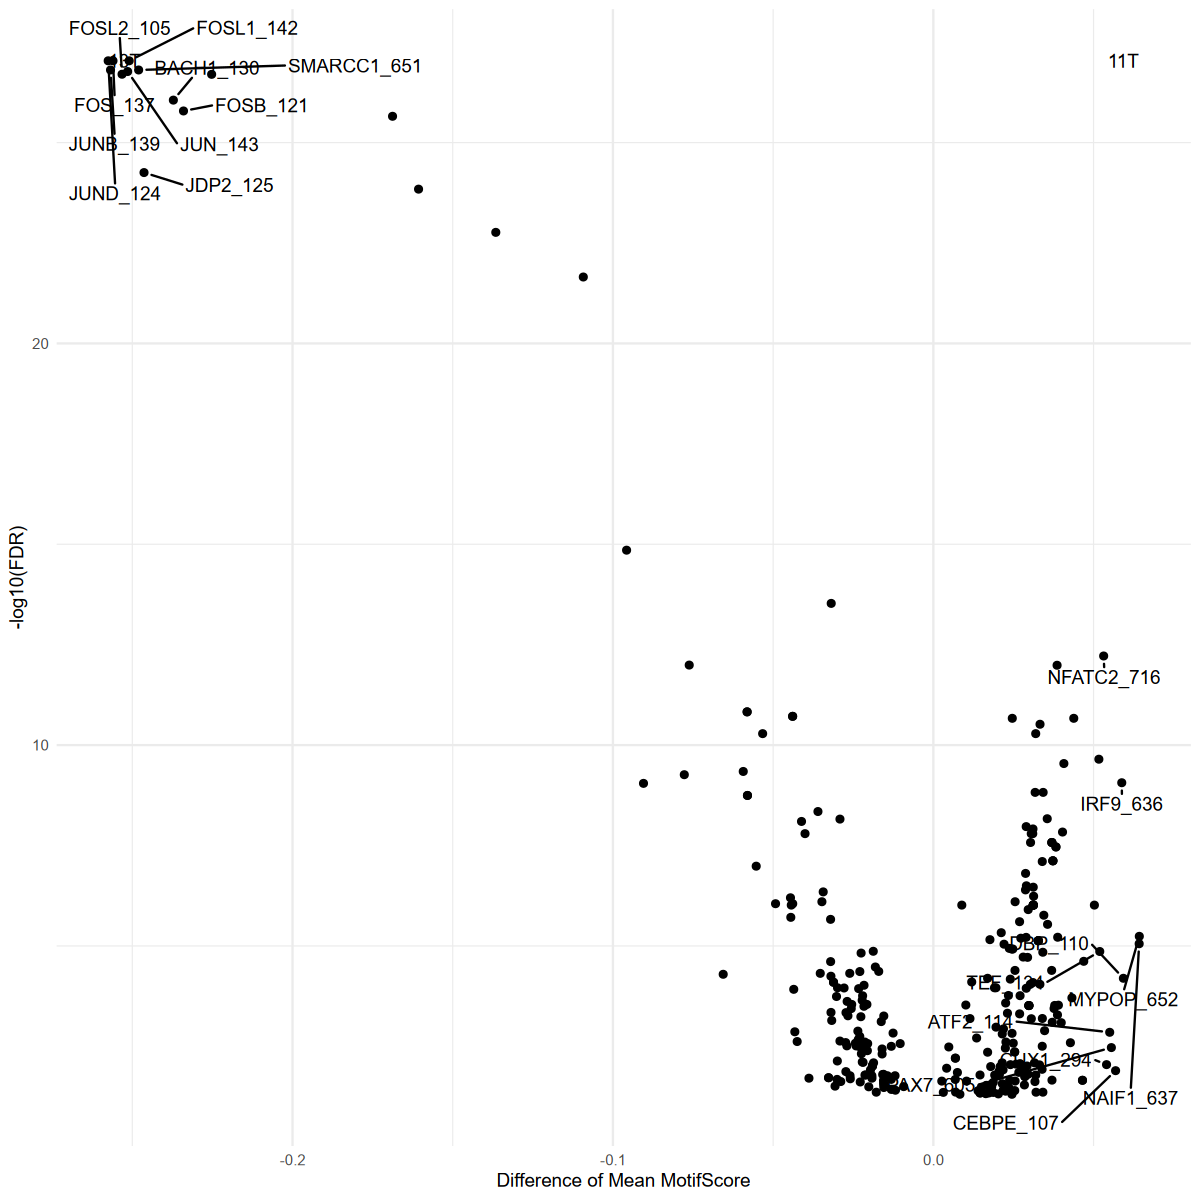

In [89]:
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:10)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:10)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "13T", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "11T", hjust = 1)

# 显示图形
print(p)

In [ ]:
# 检查选定基因的位点可及性
gene_list <- c("SPP1", "FOLR2", "CD163", "C1QB", "CXCL9", "CXCL10", "CD86", "CCL2")

p <- plotBrowserTrack(
    ArchRProj = proj_after,
    groupBy = "Sample",
    geneSymbol = gene_list, 
    upstream = 50000,
    downstream = 50000
)

plotPDF(p, name = "Macro_after_neoadjuvant_track",ArchRProj = proj_after, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-4aad77e4813c1-Date-2025-04-21_Time-12-25-00.610428.log
If there is an issue, please report to github with logFile!

2025-04-21 12:25:00.709689 : Validating Region, 0.002 mins elapsed.



GRanges object with 8 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4   87975650-87983426      + |        6696        SPP1
  [2]    chr11   72216601-72221950      + |        2350       FOLR2
  [3]    chr12     7470813-7503893      - |        9332       CD163
  [4]     chr1   22652762-22661538      + |         713        C1QB
  [5]     chr4   76001275-76007488      - |        4283       CXCL9
  [6]     chr4   76021117-76023497      - |        3627      CXCL10
  [7]     chr3 122055366-122121139      + |         942        CD86
  [8]    chr17   34255285-34257203      + |        6347        CCL2
  -------
  seqinfo: 24 sequences from hg38 genome


2025-04-21 12:25:00.807424 : Adding Bulk Tracks (1 of 8), 0.003 mins elapsed.

2025-04-21 12:25:02.390515 : Adding Feature Tracks (1 of 8), 0.03 mins elapsed.

2025-04-21 12:25:02.485565 : Adding Gene Tracks (1 of 8), 0.031 mins elapsed.

2025-04-21 12:25:02.880391 : Plotting, 0.038 mins elapsed.

2025-04-21 12:25:03.808813 : Adding Bulk Tracks (2 of 8), 0.053 mins elapsed.

2025-04-21 12:25:05.553414 : Adding Feature Tracks (2 of 8), 0.082 mins elapsed.

2025-04-21 12:25:05.684949 : Adding Gene Tracks (2 of 8), 0.085 mins elapsed.

2025-04-21 12:25:06.245486 : Plotting, 0.094 mins elapsed.

2025-04-21 12:25:07.44784 : Adding Bulk Tracks (3 of 8), 0.114 mins elapsed.

2025-04-21 12:25:09.117222 : Adding Feature Tracks (3 of 8), 0.142 mins elapsed.

2025-04-21 12:25:09.225742 : Adding Gene Tracks (3 of 8), 0.144 mins elapsed.

2025-04-21 12:25:09.616451 : Plotting, 0.15 mins elapsed.

2025-04-21 12:25:10.687212 : Adding Bulk Tracks (4 of 8), 0.168 mins elapsed.

2025-04-21 12:25:13.2901

NULL
_msg_send errno: 4 strerror: Interrupted system call


Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



In [ ]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] harmony_1.2.3                     presto_1.0.0                     
 [3] nabor_0.5.0                       circlize_0.4.16                  
 [5] ComplexHeatmap_2.